### Telecom Churn Case Study:

Business Scenario:<br>

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

Objective:<br>

Analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. 

Steps:

1.Preprocess data (convert columns to appropriate formats, handle missing values, etc.) <br>
2.Conduct appropriate exploratory analysis to extract useful insights (whether directly useful for business or for eventual modelling/feature engineering). <br>
3.Derive new features.<br>
4.Reduce the number of variables using PCA.<br>
5.Train a variety of models, tune model hyperparameters, etc. (handle class imbalance using appropriate techniques). <br>
6.Evaluate the models using appropriate evaluation metrics. Note that is is more important to identify churners than the non-churners accurately - choose an appropriate evaluation metric which reflects this business goal.<br>
7.Finally, choose a model based on some evaluation metric. <br>



In [6]:
#Importing libraries

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
# Importing Pandas and NumPy
import pandas as pd, numpy as np
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# Reading and Understanding the data:

In [ ]:
#lets check the current working directory
from os import chdir, getcwd
wd=getcwd()
wd
chdir(wd)
wd

In [8]:
data = pd.read_csv('telecom_churn_data.csv', encoding=' ISO-8859-1')
pd.set_option('display.max_columns', None)
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [9]:
print("Rows:",data.shape[0])
print("Columns:",data.shape[1])

Rows: 99999
Columns: 226


In [10]:
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [11]:
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [12]:
#Checking the datatypes for 'last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9' cols:

data[['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9']].dtypes

last_date_of_month_6    object
last_date_of_month_7    object
last_date_of_month_8    object
last_date_of_month_9    object
dtype: object

In [13]:
#Checkinh the datatypes for 'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9':

data[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9']].dtypes

date_of_last_rech_6    object
date_of_last_rech_7    object
date_of_last_rech_8    object
date_of_last_rech_9    object
dtype: object

In [14]:
#Converting the 'last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9' cols to date:

data[['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9']]=data[['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9']].apply(lambda x: pd.to_datetime(x,errors = 'coerce', format = '%m-%d-%Y'))
data[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9']]= data[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9']].apply(lambda x: pd.to_datetime(x,errors = 'coerce', format = '%m-%d-%Y'))

As per the scenario:<br>
The first two months are the ‘good’ phase, <br>
The third month is the ‘action’ phase, <br>
while the fourth month is the ‘churn’ phase.

In [15]:
# data cleaning 
# impute with Zero - either Zero is the mode or it is the minimum value in case of a continuous column
# Less Percentage of missing values - use traditional mean , median, mode or advanced methods (optional)
# check for skewness and drop highly skewed columns


In [16]:
# Filter high value customers

In [17]:
# Average Total_Rech_calling

In [18]:
data.shape

(99999, 226)

In [19]:
#lets segregate the numerical and categorical variables
#categorical variables
categorical=[]
numerical = []
for i in data.columns:
    if (data[i].dtype == "object"):
        categorical.append(i)
    else:
        numerical.append(i)

In [20]:
print(len(categorical))

4


In [21]:
print(len(numerical))

222


In [22]:
data_cat = data[categorical]
data_num = data[numerical]

In [23]:
data_num.shape

(99999, 222)

In [24]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 222 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](8), float64(179), int64(35)
memory usage: 169.4 MB


In [25]:
data_cat.head()

,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
0,6/21/2014,7/16/2014,8/8/2014,NaN
1,NaN,7/25/2014,8/10/2014,NaN
2,NaN,NaN,NaN,9/17/2014
3,NaN,NaN,NaN,NaN
4,6/4/2014,NaN,NaN,NaN


In [26]:
data_num.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,NaT,NaT,NaT,NaT,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,NaT,NaT,NaT,NaT,252,252,252,0,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,

In [27]:
# Drop the columns with 100% null values 
data_num.dropna(axis='columns',how='all',inplace=True)

In [28]:
data_num.shape

(99999, 214)

In [29]:
#Check for columns with all null values
data_num.isnull().all(axis=0).sum()

0

In [30]:
#Check for rows with all null values
data_num.isnull().all(axis=1).sum()

0

In [31]:
for col in data_cat.columns:
    data_cat[col]=pd.to_datetime(data_cat[col],dayfirst=True)

In [32]:
data_cat.head()

,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
0,2014-06-21,2014-07-16,2014-08-08,NaT
1,NaT,2014-07-25,2014-10-08,NaT
2,NaT,NaT,NaT,2014-09-17
3,NaT,NaT,NaT,NaT
4,2014-04-06,NaT,NaT,NaT


In [33]:
100 *data_cat.isnull().sum()/len(data_cat.index)

date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_8    73.660737
date_of_last_rech_data_9    74.077741
dtype: float64

In [34]:
# Data_cat columns which are above 70% null values , lets park these for now and revist later if we will need these.

# Data Preparation using 'data_num' dataset: 

In [35]:
data_num.isnull().sum()

mobile_number        0
circle_id            0
loc_og_t2o_mou    1018
std_og_t2o_mou    1018
loc_ic_t2o_mou    1018
                  ... 
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
sep_vbc_3g           0
Length: 214, dtype: int64

In [36]:
# lets check for null values in the dataframe 

In [37]:
col = data_num.loc[:,round(100 * data_num.isnull().sum()/len(data_num.index),2)>70].columns

In [38]:
len(col)

36

In [39]:
# 36 columns have more then 70 percent NUll values , they can be removed given this high percentage 
# lets check the columns in case they have an significance

In [40]:
print(col)

Index(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')


In [41]:
for i in col:
    data_num.drop([i],axis=1,inplace=True)

In [42]:
data_num.shape

(99999, 178)

## Let's filter the high value customers before we treat the null values the data 
## For which we need to take the average of the total recharge amounts done by the customers during the good phase.

In [43]:
data_num['Avg_rech_6_7']=round((data_num['total_rech_amt_6']+data_num['total_rech_amt_7'])/2,2)

In [44]:
data_num['Avg_rech_6_7'].size

99999

In [45]:
data_num['Avg_rech_6_7'][0:10]

0     307.0
1     229.0
2     241.5
3     270.0
4     273.0
5      60.0
6     360.5
7    1185.0
8     519.0
9     207.5
Name: Avg_rech_6_7, dtype: float64

In [46]:
# lets filter the data for high value customers , basis above 70 percentile of the Avg_rech_6_7
# High-value customers are those customers who have recharged with an amount more than or equal to X, 
# where X is the 70th percentile of 
# the average recharge amount in the first two months (the good phase)

In [47]:
HVC = data_num['Avg_rech_6_7'].quantile(0.7)

In [48]:
data_num = data_num.loc[data_num['Avg_rech_6_7']> HVC ,:]

In [49]:
data_num.shape

(29979, 179)

In [50]:
data_num['Avg_rech_6_7'].describe()

count    29979.000000
mean       697.014644
std        488.925223
min        369.000000
25%        450.000000
50%        569.000000
75%        796.000000
max      37762.500000
Name: Avg_rech_6_7, dtype: float64

In [51]:
#lets check for rows null values 
data_num.isnull().any(axis=1).sum()

2019

In [52]:
#lets check for columns skewness
skew_ness_percentage = 90

In [53]:
cols_skewed=[]
for i in data_num.columns:
    val_cnt = data_num[i].value_counts(dropna=False)
    top_per_cnt = 100 * (val_cnt.iloc[0]/len(data_num.index))
    if(top_per_cnt > skew_ness_percentage):
        cols_skewed.append(i)
        print(val_cnt[:2,])
    

109    29979
Name: circle_id, dtype: int64
0.0    29865
NaN      114
Name: loc_og_t2o_mou, dtype: int64
0.0    29865
NaN      114
Name: std_og_t2o_mou, dtype: int64
0.0    29865
NaN      114
Name: loc_ic_t2o_mou, dtype: int64
0.0    29663
NaN      316
Name: std_og_t2c_mou_6, dtype: int64
0.0    29676
NaN      303
Name: std_og_t2c_mou_7, dtype: int64
0.0    29041
NaN      938
Name: std_og_t2c_mou_8, dtype: int64
0.0    28276
NaN     1703
Name: std_og_t2c_mou_9, dtype: int64
0.0    27025
NaN      316
Name: isd_og_mou_6, dtype: int64
0.0    27173
NaN      303
Name: isd_og_mou_7, dtype: int64
0.0    29512
NaN      303
Name: og_others_7, dtype: int64
0.0    28861
NaN      938
Name: og_others_8, dtype: int64
0.0    28100
NaN     1703
Name: og_others_9, dtype: int64
0.0    29663
NaN      316
Name: std_ic_t2o_mou_6, dtype: int64
0.0    29676
NaN      303
Name: std_ic_t2o_mou_7, dtype: int64
0.0    29041
NaN      938
Name: std_ic_t2o_mou_8, dtype: int64
0.0    28276
NaN     1703
Name: std_ic_t2

In [54]:
cols_skewed

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'og_others_7',
 'og_others_8',
 'og_others_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9',
 'spl_ic_mou_7',
 'monthly_2g_9',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'sachet_3g_9',
 'sep_vbc_3g']

In [55]:
len(cols_skewed)

24

In [56]:
# lets drop these colummns which are skewed 90 % , they are unlikely to be significant 

In [57]:
data_num.drop(cols_skewed,axis=1,inplace=True)

In [58]:
# Now as per mentioned to derive whether a customer is going to churn or not we need to consider the 9th month.
# If total IC, OC, 2G and 3G for the 9th month is equals to 0 then the customer is churn(1) otherwise non-churn(0)

data_num['churn'] =  np.where(data_num[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0,1,0)

In [59]:
# Calculating the churn and non-churn percentage:

data_num['churn'].value_counts()/len(data_num)*100

0    91.363955
1     8.636045
Name: churn, dtype: float64

In [60]:
data_num.shape

(29979, 156)

In [61]:
data_num.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Avg_rech_6_7,churn
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,60.86,75.14,77.84,NaN,10.01,NaN,4.50,0.00,6.50,NaN,0.00,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.00,0.21,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1185.0,1
8,7001524846,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,130.26,143.48,98.28,81.46,0.00,0.0,0.00,0.00,10.23,0.00,0.00,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,22.43,4.08,0.65,13.53,0.00,0.00,0.00,0.0,22.43,4.66,0.75,13.53,103.86,28.49,16.54,34.91,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,15,437,601,120,186,90,154,30,36,50,0,10,0,0.0,356.0,0.03,0.0,0.0,750.95,11.94,0.0,0,1,0,0,1,3,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0
13,7002191713,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,119.28,482.46,214.06,23.53,144.24,72.11,136.78,7.98,

In [62]:
# lets check the dataset again
(data_num.isnull().sum() * 100 / len(data_num)).sort_values(ascending = False)


ic_others_9           5.680643
roam_ic_mou_9         5.680643
loc_og_t2c_mou_9      5.680643
std_og_t2m_mou_9      5.680643
spl_og_mou_9          5.680643
                        ...   
max_rech_amt_8        0.000000
max_rech_amt_9        0.000000
last_day_rch_amt_6    0.000000
last_day_rch_amt_7    0.000000
mobile_number         0.000000
Length: 156, dtype: float64

In [63]:
# Lets check for columns for 9th month and drop them from the dataset , since they were only required to 
# classify Churn

In [64]:
col_9=[]
pat= '_9'
for i in data_num.columns:
    if pat in i:
        col_9.append(i)
    

In [65]:
col_9

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'sachet_2g_9',
 'monthly_3g_9']

In [66]:
data_num.drop(col_9,axis=1,inplace=True)

In [67]:
len(col_9)

37

In [68]:
data_num.shape

(29979, 119)

In [69]:
# Till now we have removed columns which are highly skewed 
# Have removed columns from churn month as we won't use it in our prediction

# Let us check again the null values for data_num1 dataset:

(data_num.isnull().sum() * 100 / len(data_num)).sort_values(ascending = False)

loc_ic_t2f_mou_8      3.128857
loc_og_t2m_mou_8      3.128857
loc_og_t2c_mou_8      3.128857
loc_og_mou_8          3.128857
ic_others_8           3.128857
                        ...   
max_rech_amt_7        0.000000
max_rech_amt_8        0.000000
last_day_rch_amt_6    0.000000
last_day_rch_amt_7    0.000000
mobile_number         0.000000
Length: 119, dtype: float64

In [70]:
data_num.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Avg_rech_6_7,churn
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,10.01,4.50,0.00,6.50,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1185.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,10.23,0.00,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,315,21.03,910.65,122.16,519.0,0
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,1.29,0.00,0.00,4.78,0.00,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,2607,0.00,0.00,0.00,380.0,0
16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.00,0.00,0.00,30.89,67.09,21.53,0.00,0.00,3.26,5.91,0.00,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8

In [71]:
col_6=[]
pat= '_6'
for i in data_num.columns:
    if pat in i:
        col_6.append(i)

In [72]:
col_6

['arpu_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'total_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'last_day_rch_amt_6',
 'vol_2g_mb_6',
 'vol_3g_mb_6',
 'monthly_2g_6',
 'sachet_2g_6',
 'monthly_3g_6',
 'Avg_rech_6_7']

In [73]:
# Lets check for Month 6 Total_og_mou components and remove them 

In [74]:
data_num['total_temp_6']=data_num[['roam_og_mou_6','loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_mou_6',
 'spl_og_mou_6',
                                   
 'og_others_6']].sum(axis=1)


In [75]:
data_num[['total_temp_6','total_og_mou_6']]

,total_temp_6,total_og_mou_6
7,994.26,487.53
8,1016.69,508.36
13,1822.14,907.09
16,693.58,346.81
17,2495.50,1249.53
...,...,...
99970,623.11,288.54
99974,897.18,451.24
99986,3201.55,1600.79
99988,751.53,375.78


In [76]:
# total_temp_6 is total of the month 6 , whereas total_og_mou_6 i total of month 6 except roam_og_mou_6

In [77]:
data_num=data_num.drop('total_temp_6',1)

In [78]:
data_num_6= data_num[['roam_og_mou_6','loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_mou_6',
 'spl_og_mou_6',
 'og_others_6']]

In [79]:
data_num_6.shape

(29979, 12)

In [80]:
data_num_6.head()

,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_mou_6,spl_og_mou_6,og_others_6
7,23.74,51.39,308.63,62.13,0.0,422.16,4.30,49.89,6.66,60.86,4.50,0.00
8,0.00,297.13,80.96,0.00,0.0,378.09,116.56,13.69,0.00,130.26,0.00,0.00
13,7.98,49.63,151.13,4.54,0.0,205.31,446.41,255.36,0.00,701.78,0.00,0.00
16,0.00,42.61,273.29,0.00,0.0,315.91,7.89,22.99,0.00,30.89,0.00,0.00
17,0.00,38.99,58.54,0.00,0.0,97.54,1146.91,1.55,0.00,1148.46,2.58,0.93


In [81]:
data_num['total_og_mou_6']

7         487.53
8         508.36
13        907.09
16        346.81
17       1249.53
          ...   
99970     288.54
99974     451.24
99986    1600.79
99988     375.78
99997       0.00
Name: total_og_mou_6, Length: 29979, dtype: float64

### We keep only `roam_og_mou_6` and `total_og_mou_6` for further analysis an drop all columns which are 
### contained in total_og_mou_6

In [82]:
# total_og_mou_6 is the sum of all OG columns except roam_og column:
# Therefore, we can remove the other OG columns.

col_6_og = ['loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_mou_6',
 'spl_og_mou_6',
 'og_others_6']


In [83]:
data_num.drop(col_6_og,1,inplace=True)

In [84]:
data_num.shape  

(29979, 108)

## Lets do for month 7 and month 8 as done for month 6

### We keep only `roam_og_mou_7` and `total_og_mou_7` for further analysis.

In [85]:
col_7_og = ['loc_og_t2t_mou_7',
 'loc_og_t2m_mou_7',
 'loc_og_t2f_mou_7',
 'loc_og_t2c_mou_7',
 'loc_og_mou_7',
 'std_og_t2t_mou_7',
 'std_og_t2m_mou_7',
 'std_og_t2f_mou_7',
 'std_og_mou_7',
 'spl_og_mou_7']

In [86]:
data_num.drop(col_7_og,1,inplace=True)

In [87]:
data_num.shape

(29979, 98)

### We keep only `roam_og_mou_8` and `total_og_mou_8` for further analysis.

In [88]:
col_8_og = ['loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'std_og_mou_8',
 'spl_og_mou_8']

In [89]:
data_num.drop(col_8_og,1,inplace=True)

In [90]:
data_num.shape

(29979, 88)

In [91]:
# Let us check again the null values for data_num1 dataset:

(data_num.isnull().sum() * 100 / len(data_num)).sort_values(ascending = False)

std_ic_mou_8          3.128857
roam_ic_mou_8         3.128857
std_ic_t2f_mou_8      3.128857
std_ic_t2t_mou_8      3.128857
spl_ic_mou_8          3.128857
                        ...   
max_rech_amt_8        0.000000
last_day_rch_amt_6    0.000000
last_day_rch_amt_7    0.000000
last_day_rch_amt_8    0.000000
mobile_number         0.000000
Length: 88, dtype: float64

In [92]:
col_6

['arpu_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'total_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'last_day_rch_amt_6',
 'vol_2g_mb_6',
 'vol_3g_mb_6',
 'monthly_2g_6',
 'sachet_2g_6',
 'monthly_3g_6',
 'Avg_rech_6_7']

In [93]:
col_ic_6=data_num[['roam_ic_mou_6', 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6']]

In [94]:
col_ic_6.head()

,roam_ic_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_mou_6,total_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6,ic_others_6
7,16.23,58.14,217.56,152.16,427.88,36.89,91.44,52.19,180.54,626.46,0.21,2.06,15.74
8,0.00,23.84,57.58,0.00,81.43,0.00,22.43,0.00,22.43,103.86,0.00,0.00,0.00
13,23.53,67.88,142.88,4.81,215.58,115.68,308.13,0.00,423.81,968.61,0.45,245.28,83.48
16,0.00,41.33,226.81,8.71,276.86,68.79,18.68,0.51,87.99,364.86,0.00,0.00,0.00
17,0.00,34.54,47.41,0.00,81.96,8.63,1.28,0.00,9.91,91.88,0.00,0.00,0.00


#### As can be seen `total_ic_mou_6` is the sum of all kinds of IC columns except `roam_ic_mou_6`. So we remove all the other types of IC columns except roam_ic_mou_6

In [95]:
col_6_ic=data_num[['loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6']]

In [96]:
data_num.drop(col_6_ic,1,inplace=True)

In [97]:
data_num.shape

(29979, 77)

In [98]:
col_7_ic=data_num[['loc_ic_t2t_mou_7',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2f_mou_7',
 'loc_ic_mou_7',
 'std_ic_t2t_mou_7',
 'std_ic_t2m_mou_7',
 'std_ic_t2f_mou_7',
 'std_ic_mou_7',
 'isd_ic_mou_7',
 'ic_others_7']]

In [99]:
data_num.drop(col_7_ic,1,inplace=True)

In [100]:
data_num.shape

(29979, 67)

In [101]:
col_8_ic=data_num[['loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_8']]

In [102]:
data_num.drop(col_8_ic,1,inplace=True)

In [103]:
data_num.shape

(29979, 56)

In [104]:
# Let us check again the null values for data_num dataset:

(data_num.isnull().sum() * 100 / len(data_num)).sort_values(ascending = False)

offnet_mou_8          3.128857
onnet_mou_8           3.128857
isd_og_mou_8          3.128857
roam_og_mou_8         3.128857
roam_ic_mou_8         3.128857
roam_ic_mou_6         1.054071
offnet_mou_6          1.054071
roam_og_mou_6         1.054071
onnet_mou_6           1.054071
onnet_mou_7           1.010707
offnet_mou_7          1.010707
roam_ic_mou_7         1.010707
roam_og_mou_7         1.010707
total_og_mou_8        0.000000
total_rech_num_6      0.000000
total_ic_mou_8        0.000000
total_rech_num_7      0.000000
total_rech_num_8      0.000000
total_ic_mou_7        0.000000
total_ic_mou_6        0.000000
churn                 0.000000
total_og_mou_7        0.000000
total_og_mou_6        0.000000
Avg_rech_6_7          0.000000
arpu_8                0.000000
arpu_7                0.000000
arpu_6                0.000000
total_rech_amt_6      0.000000
total_rech_amt_7      0.000000
total_rech_amt_8      0.000000
monthly_2g_7          0.000000
jun_vbc_3g            0.000000
jul_vbc_

In [105]:
# Converting AON (age of the network) in months from days, as we will be predicting for months:
data_num['aon_in_mon'] = data_num['aon']/30
#data_num.drop('aon', axis=1, inplace=True)
data_num['aon_in_mon'].head()

7     26.733333
8     10.500000
13    86.900000
16    17.033333
17    22.233333
Name: aon_in_mon, dtype: float64

In [106]:
null_cols= data_num.loc[:,data_num.isnull().any()]

In [107]:
len(null_cols.columns)

13

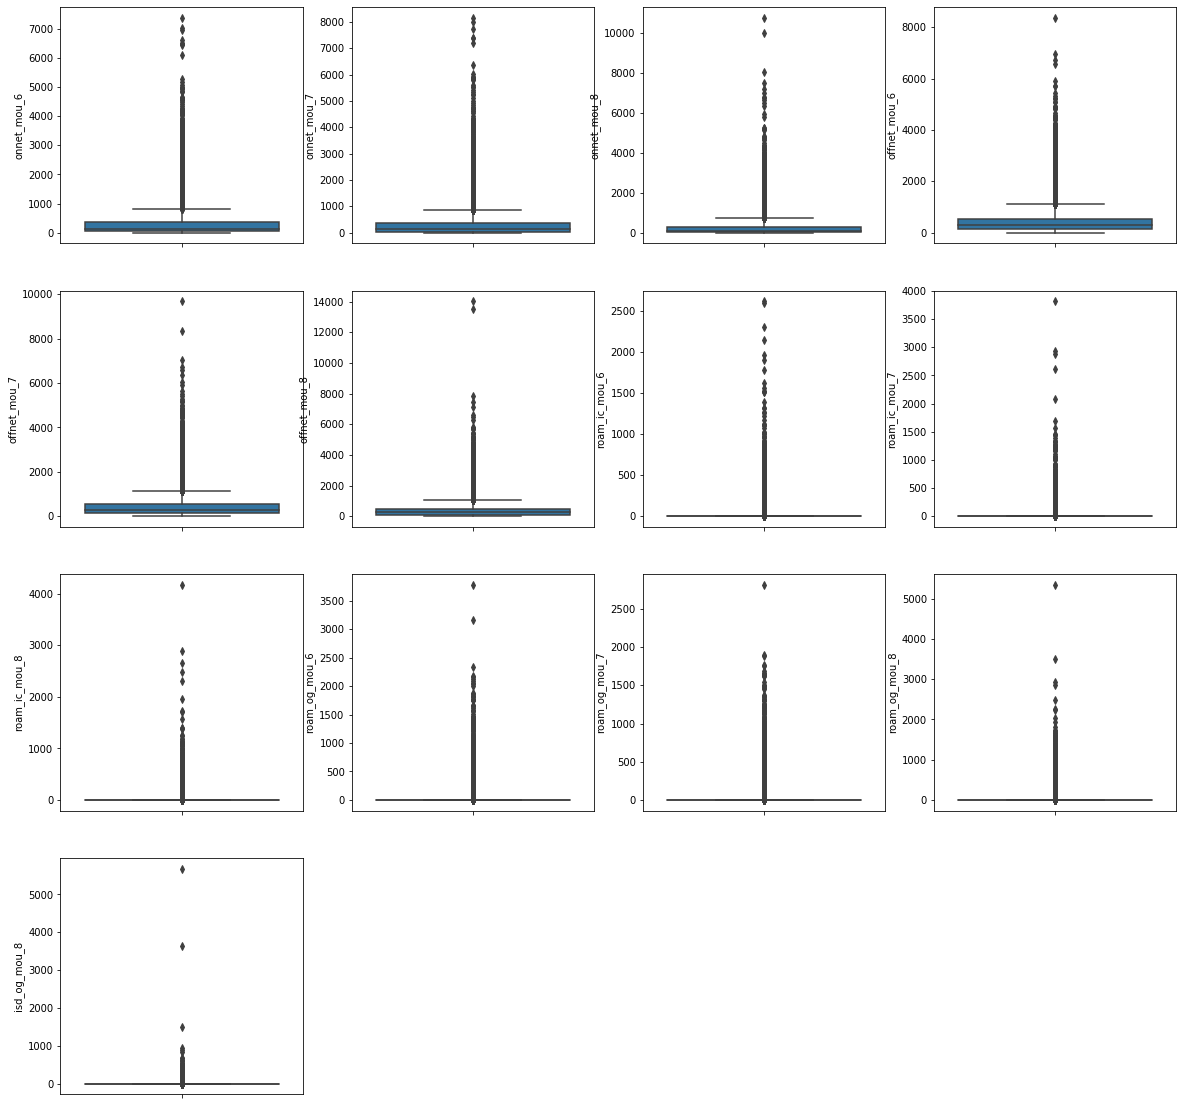

In [108]:
# Verifying for outliers:
plt.figure(figsize=(20,20))
count=1
for i in null_cols.columns:
    plt.subplot(4,4,count)
    sns.boxplot(data=null_cols,x=i,orient='v')
    count+=1

In [109]:
data_num['churn'].value_counts()/len(data_num)*100

0    91.363955
1     8.636045
Name: churn, dtype: float64

In [110]:
data_num.shape

(29979, 57)

In [111]:
null_rows= data_num.loc[data_num.isnull().sum(axis=1)>5,:]

In [112]:
null_rows

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,isd_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Avg_rech_6_7,churn,aon_in_mon
490,7000369789,679.329,0.000,0.000,189.51,NaN,NaN,920.18,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN,1109.69,0.00,0.00,120.03,0.00,0.0,18,0,0,786,0,0,110,0,0,50,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,341,0.00,0.00,0.00,393.0,1,11.366667
539,7000670087,704.033,0.000,0.000,199.04,NaN,NaN,132.31,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN,336.73,0.00,0.00,154.88,0.00,0.0,29,3,1,833,0,0,150,0,0,50,0,0,73.92,0.00,0.00,2503.67,0.00,0.00,0,0,0,0,0,0,0,0,0,714,0.00,0.00,644.38,416.5,1,23.800000
1489,7002056402,600.339,76.826,986.809,NaN,NaN,0.0,NaN,NaN,6.96,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.00,0.00,6.96,0.00,0.00,0.0,2,2,5,707,91,1162,455,91,455,455,0,252,87.65,230.56,42.79,3220.44,14.59,4407.08,0,0,0,0,0,0,2,0,3,1658,66.00,0.00,0.00,399.0,0,55.266667
1555,7002024450,1138.800,0.000,0.000,75.79,NaN,NaN,1014.61,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN,1090.41,0.00,0.00,1846.01,0.00,0.0,9,0,0,986,0,0,300,0,0,86,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,1116,0.00,0.00,1026.06,493.0,1,37.200000
1802,7000516213,810.455,0.000,0.000,91.33,NaN,NaN,1371.04,NaN,NaN,1.21,NaN,NaN,11.23,NaN,NaN,NaN,1477.19,0.00,0.00,71.71,0.00,0.0,21,3,0,955,0,0,110,0,0,30,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,755,0.00,0.00,0.00,477.5,1,25.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97850,7001683776,11505.508,0.000,0.000,320.94,NaN,NaN,674.54,NaN,NaN,70.20,NaN,NaN,203.70,NaN,NaN,NaN,2066.71,0.00,0.00,1086.99,0.00,0.0,12,2,0,12000,0,0,1500,0,0,1000,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,3651,0.00,0.00,0.00,6000.0,1,121.700000
97950,7001026796,20.000,1358.221,0.000,NaN,12.81,NaN,NaN,20.06,NaN,NaN,13.89,NaN,NaN,12.01,NaN,NaN,0.00,20.86,0.00,0.00,4.73,0.0,2,8,4,0,1600,0,0,600,0,0,0,0,0.00,157.61,0.00,0.00,1919.21,0.00,0,0,0,0,0,0,0,0,0,556,36.58,1007.28,0.00,800.0,1,18.533333
98790,7000445861,2021.180,0.000,0.000,2553.13,NaN,NaN,2895.36,NaN,NaN,12.23,NaN,NaN,69.58,NaN,NaN,NaN,5380.78,0.00,0.00,1204.34,0.00,0.0,25,3,0,2344,0,0,128,0,0,110,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,702,0.00,0.00,0.00,1172.0,1,23.400000
98943,7000806379,427.626,427.592,213.801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.0,2,3,2,504,504,252,252,252,252,252,252,0,0.00,0.00,0.00,1515.56,1354.30,1966.28,0,0,0,0,0,0,2,2,1,489,0.00,0.00,0.00,504.0,0,16.300000


In [113]:
len(data_num[data_num.isnull().sum(axis=1) > 5].index)

285

In [114]:
# retaining the rows having <= 5 NaNs
data_num = data_num[data_num.isnull().sum(axis=1) <= 5]

In [115]:
data_num.shape

(29694, 57)

In [116]:
data_num['churn'].value_counts()/len(data_num)*100

0    91.833367
1     8.166633
Name: churn, dtype: float64

In [117]:
# Let us check again the null values for data_num dataset:

(data_num.isnull().sum() * 100 / len(data_num)).sort_values(ascending = False)

offnet_mou_8          2.259716
onnet_mou_8           2.259716
isd_og_mou_8          2.259716
roam_og_mou_8         2.259716
roam_ic_mou_8         2.259716
roam_ic_mou_6         0.508520
offnet_mou_6          0.508520
roam_og_mou_6         0.508520
onnet_mou_6           0.508520
onnet_mou_7           0.144810
offnet_mou_7          0.144810
roam_ic_mou_7         0.144810
roam_og_mou_7         0.144810
total_og_mou_8        0.000000
total_rech_num_6      0.000000
total_ic_mou_8        0.000000
total_rech_num_7      0.000000
total_rech_num_8      0.000000
total_ic_mou_7        0.000000
total_ic_mou_6        0.000000
aon_in_mon            0.000000
total_og_mou_7        0.000000
total_og_mou_6        0.000000
total_rech_amt_7      0.000000
arpu_8                0.000000
arpu_7                0.000000
arpu_6                0.000000
total_rech_amt_6      0.000000
total_rech_amt_8      0.000000
churn                 0.000000
max_rech_amt_6        0.000000
Avg_rech_6_7          0.000000
jun_vbc_

### Impute null values with median given the spread of the data:

In [118]:
for i in null_cols.columns:
    data_num.loc[np.isnan(data_num[i]), [i]] = data_num[i].median()

In [119]:
# Let us check again the null values for data_num dataset:

(data_num.isnull().sum() * 100 / len(data_num)).sort_values(ascending = False)

aon_in_mon            0.0
total_rech_amt_7      0.0
total_rech_num_8      0.0
total_rech_num_7      0.0
total_rech_num_6      0.0
total_ic_mou_8        0.0
total_ic_mou_7        0.0
total_ic_mou_6        0.0
total_og_mou_8        0.0
total_og_mou_7        0.0
total_og_mou_6        0.0
isd_og_mou_8          0.0
roam_og_mou_8         0.0
roam_og_mou_7         0.0
roam_og_mou_6         0.0
roam_ic_mou_8         0.0
roam_ic_mou_7         0.0
roam_ic_mou_6         0.0
offnet_mou_8          0.0
offnet_mou_7          0.0
offnet_mou_6          0.0
onnet_mou_8           0.0
onnet_mou_7           0.0
onnet_mou_6           0.0
arpu_8                0.0
arpu_7                0.0
arpu_6                0.0
total_rech_amt_6      0.0
total_rech_amt_8      0.0
churn                 0.0
max_rech_amt_6        0.0
Avg_rech_6_7          0.0
jun_vbc_3g            0.0
jul_vbc_3g            0.0
aug_vbc_3g            0.0
aon                   0.0
monthly_3g_8          0.0
monthly_3g_7          0.0
monthly_3g_6

In [120]:
data_num['churn'].value_counts()/len(data_num)*100

0    91.833367
1     8.166633
Name: churn, dtype: float64

In [121]:
data_num.shape

(29694, 57)

In [122]:
data_num.columns

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'isd_og_mou_8',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6',
       'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6',
       'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'vol_2g_mb_6',
       'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6',
       'monthly_3g_7', 'monthly_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g', 'Avg_rech

## Creating Derived Features For Good Phase (month 6 & month 7)

In [123]:
data_num['onnet_mou_good_phase']= data_num['onnet_mou_6']+ data_num['onnet_mou_7']
data_num['offnet_mou_good_phase']=data_num['offnet_mou_6']+ data_num['offnet_mou_7']
data_num['arpu_good_phase']= data_num['arpu_6']+ data_num['arpu_7']
data_num['roam_ic_mou_good_phase']=data_num['roam_ic_mou_6']+data_num['roam_ic_mou_7']
data_num['roam_og_mou_good_phase']=data_num['roam_og_mou_6']+data_num['roam_og_mou_7']
data_num['total_og_mou_good_phase']=data_num['total_og_mou_6']+data_num['total_og_mou_7']
data_num['total_ic_mou_good_phase']=data_num['total_ic_mou_6']+data_num['total_ic_mou_7']
data_num['total_rech_num_good_phase']=data_num['total_rech_num_6']+data_num['total_rech_num_7']
data_num['total_rech_amt_good_phase']=data_num['total_rech_amt_6']+data_num['total_rech_amt_7']
data_num['max_rech_amt_good_phase']=data_num['max_rech_amt_6']+data_num['max_rech_amt_7']
data_num['last_day_rch_amt_good_phase']=data_num['last_day_rch_amt_6']+data_num['last_day_rch_amt_7']
data_num['vol_2g_mb_good_phase']=data_num['vol_2g_mb_6']+data_num['vol_2g_mb_7']
data_num['vol_3g_mb_good_phase']=data_num['vol_3g_mb_6']+data_num['vol_3g_mb_7']
data_num['monthly_2g_good_phase']=data_num['monthly_2g_6']+data_num['monthly_2g_7']
data_num['sachet_2g_good_phase']=data_num['sachet_2g_6']+data_num['sachet_2g_7']
data_num['monthly_3g_good_phase']=data_num['monthly_3g_6']+data_num['monthly_3g_7']
data_num['vbc_good_phase']=data_num['jun_vbc_3g']+data_num['jul_vbc_3g']
data_num['avg_rech_good_phase']=data_num['Avg_rech_6_7']

In [124]:
col_6_7=[]
pat= ['_6','_7']
for i in data_num:
    if pat[0] in i:
        col_6_7.append(i)
    elif pat[1] in i:
        col_6_7.append(i)

In [125]:
col_6_7

['arpu_6',
 'arpu_7',
 'onnet_mou_6',
 'onnet_mou_7',
 'offnet_mou_6',
 'offnet_mou_7',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'monthly_2g_6',
 'monthly_2g_7',
 'sachet_2g_6',
 'sachet_2g_7',
 'monthly_3g_6',
 'monthly_3g_7',
 'Avg_rech_6_7']

In [126]:
len(col_6_7)

33

In [127]:
data_num.drop(col_6_7,1,inplace=True)

In [128]:
data_num.shape

(29694, 42)

In [129]:
data_num.columns

Index(['mobile_number', 'arpu_8', 'onnet_mou_8', 'offnet_mou_8',
       'roam_ic_mou_8', 'roam_og_mou_8', 'isd_og_mou_8', 'total_og_mou_8',
       'total_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_8',
       'max_rech_amt_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'aon', 'aug_vbc_3g',
       'jul_vbc_3g', 'jun_vbc_3g', 'churn', 'aon_in_mon',
       'onnet_mou_good_phase', 'offnet_mou_good_phase', 'arpu_good_phase',
       'roam_ic_mou_good_phase', 'roam_og_mou_good_phase',
       'total_og_mou_good_phase', 'total_ic_mou_good_phase',
       'total_rech_num_good_phase', 'total_rech_amt_good_phase',
       'max_rech_amt_good_phase', 'last_day_rch_amt_good_phase',
       'vol_2g_mb_good_phase', 'vol_3g_mb_good_phase', 'monthly_2g_good_phase',
       'sachet_2g_good_phase', 'monthly_3g_good_phase', 'vbc_good_phase',
       'avg_rech_good_phase'],
      dtype='object')

In [130]:
data_num.drop(data_num[['jul_vbc_3g', 'jun_vbc_3g']],1,inplace=True)

In [131]:
data_num.shape

(29694, 40)

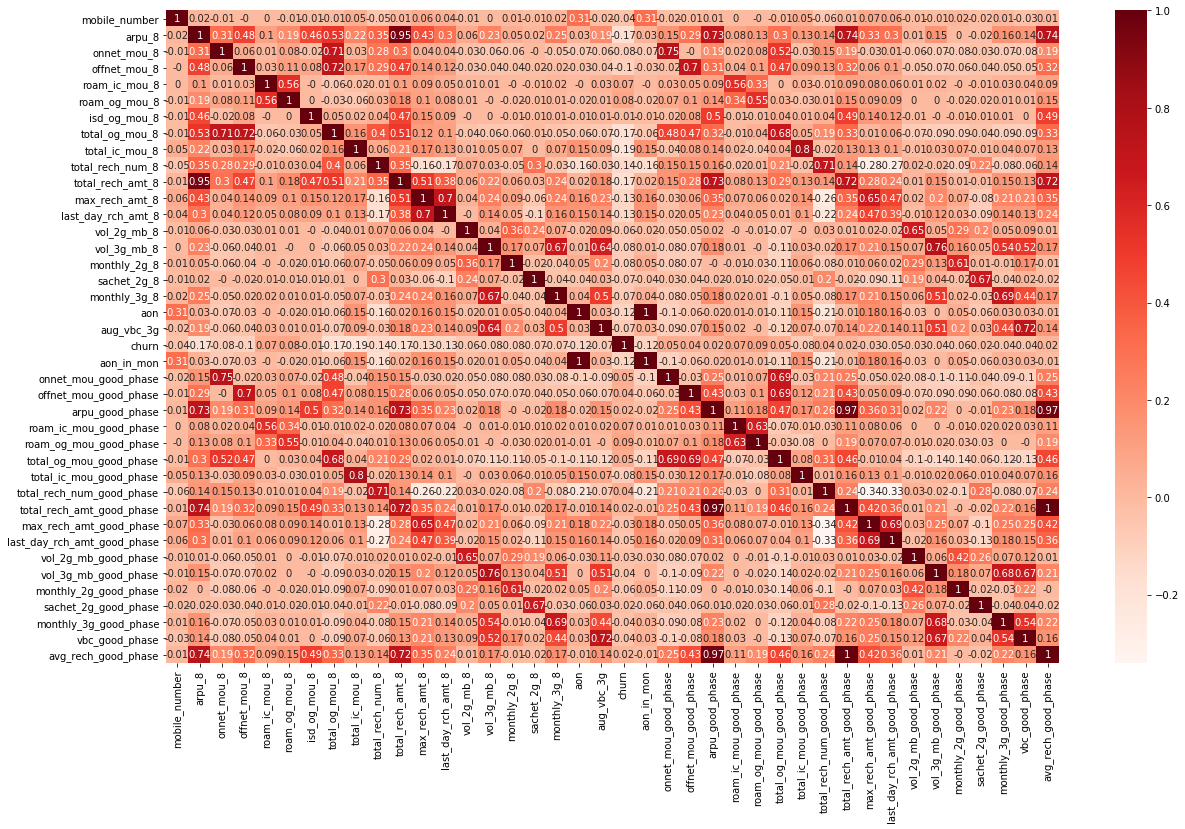

In [132]:
plt.figure(figsize=(20,12))
cor = round(data_num.corr(),2)
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)
plt.show()

In [133]:
data_num.drop('aon',1,inplace=True)

In [134]:
data_num.columns

Index(['mobile_number', 'arpu_8', 'onnet_mou_8', 'offnet_mou_8',
       'roam_ic_mou_8', 'roam_og_mou_8', 'isd_og_mou_8', 'total_og_mou_8',
       'total_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_8',
       'max_rech_amt_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'aug_vbc_3g', 'churn',
       'aon_in_mon', 'onnet_mou_good_phase', 'offnet_mou_good_phase',
       'arpu_good_phase', 'roam_ic_mou_good_phase', 'roam_og_mou_good_phase',
       'total_og_mou_good_phase', 'total_ic_mou_good_phase',
       'total_rech_num_good_phase', 'total_rech_amt_good_phase',
       'max_rech_amt_good_phase', 'last_day_rch_amt_good_phase',
       'vol_2g_mb_good_phase', 'vol_3g_mb_good_phase', 'monthly_2g_good_phase',
       'sachet_2g_good_phase', 'monthly_3g_good_phase', 'vbc_good_phase',
       'avg_rech_good_phase'],
      dtype='object')

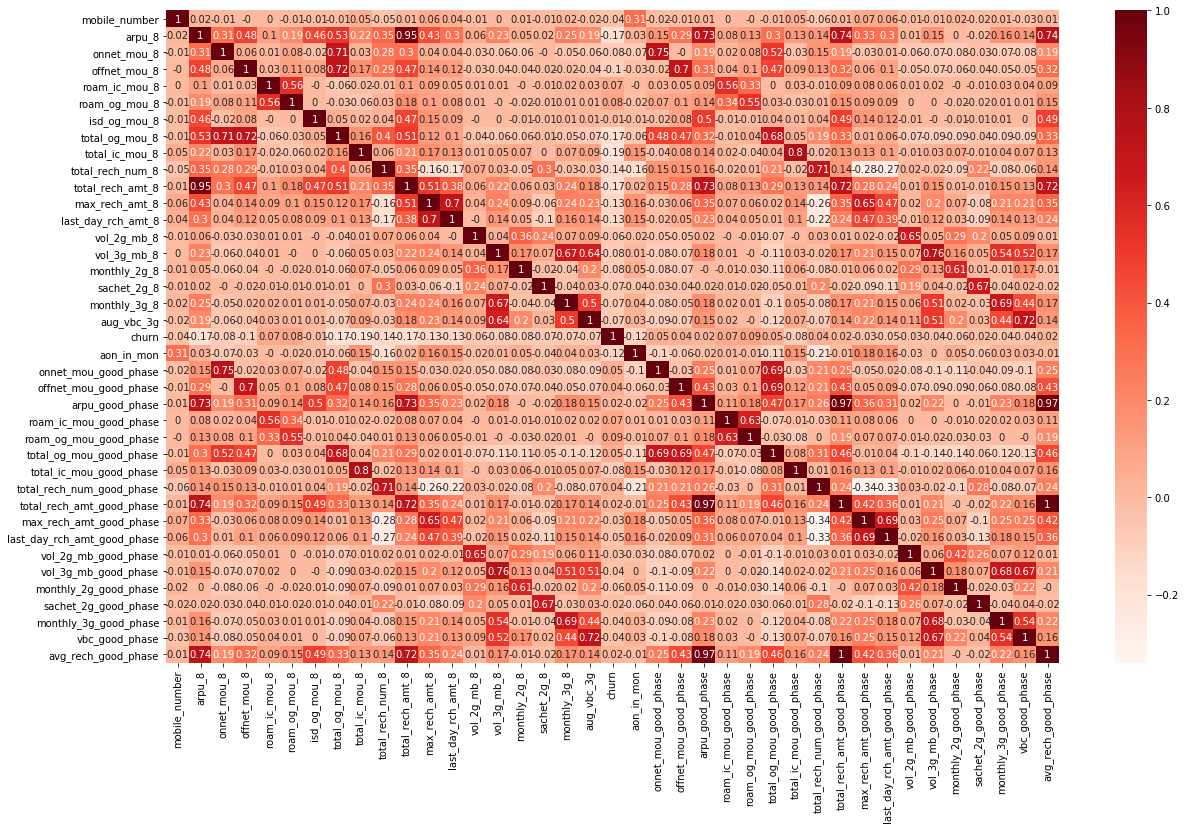

In [135]:
plt.figure(figsize=(20,12))
cor = round(data_num.corr(),2)
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)
plt.show()

In [136]:
# Average recharge amount was used to decide for HVC. It won't be required for further analhysis purpose.
# As it is highly correlated to total_rech_amt_good_phase:

data_num.drop('avg_rech_good_phase',1,inplace=True)

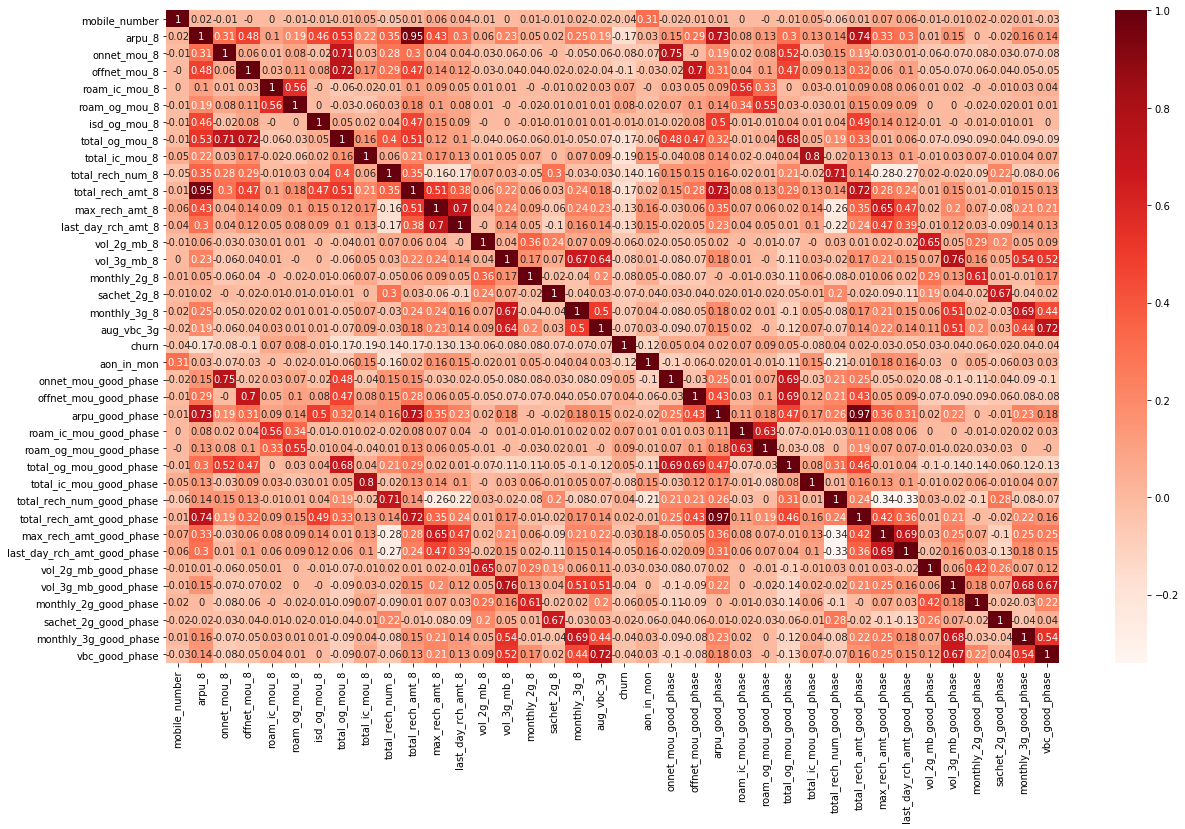

In [137]:
plt.figure(figsize=(20,12))
cor = round(data_num.corr(),2)
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)
plt.show()

In [138]:
# We are dropping arpu_good_phase as it is highly correlated to total_rech_amt_good_phase:

data_num.drop('arpu_good_phase',1,inplace=True)

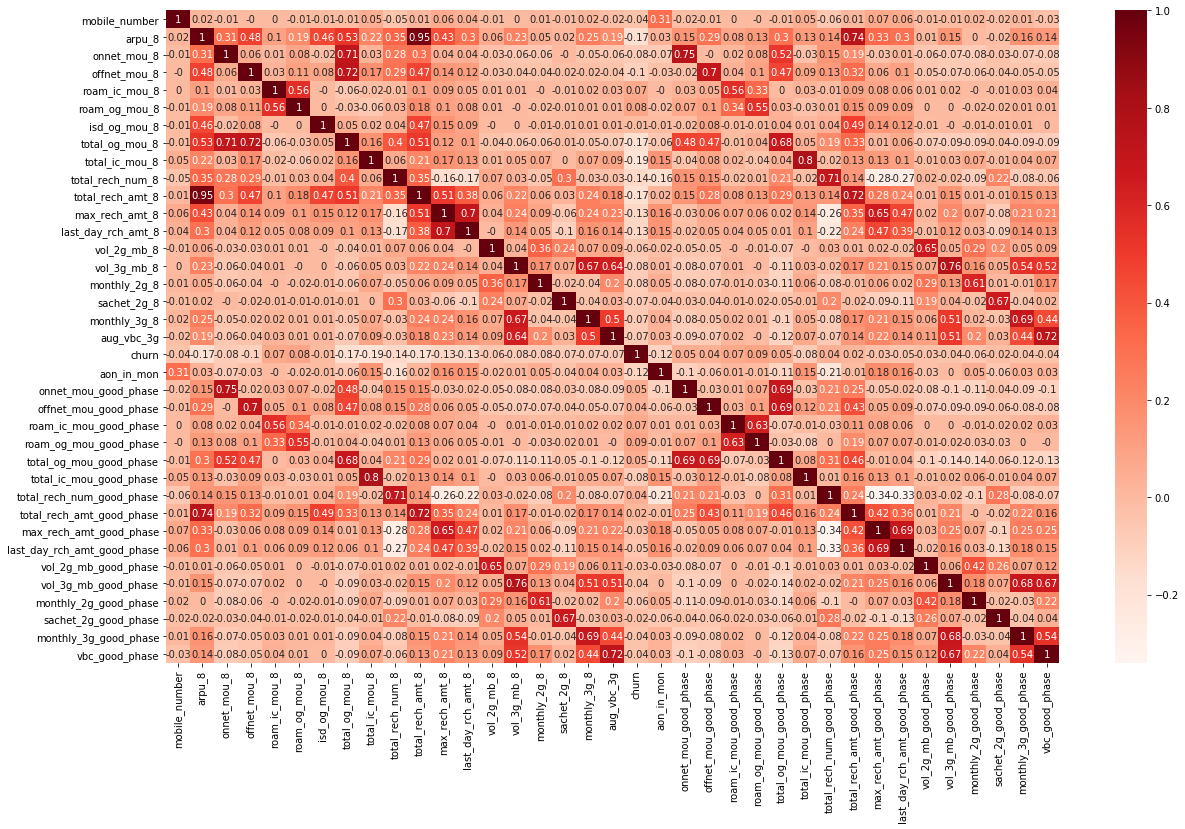

In [139]:
plt.figure(figsize=(20,12))
cor = round(data_num.corr(),2)
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)
plt.show()

In [140]:
# Imbalance Classification
# PCA

In [141]:
data_num.columns

Index(['mobile_number', 'arpu_8', 'onnet_mou_8', 'offnet_mou_8',
       'roam_ic_mou_8', 'roam_og_mou_8', 'isd_og_mou_8', 'total_og_mou_8',
       'total_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_8',
       'max_rech_amt_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'aug_vbc_3g', 'churn',
       'aon_in_mon', 'onnet_mou_good_phase', 'offnet_mou_good_phase',
       'roam_ic_mou_good_phase', 'roam_og_mou_good_phase',
       'total_og_mou_good_phase', 'total_ic_mou_good_phase',
       'total_rech_num_good_phase', 'total_rech_amt_good_phase',
       'max_rech_amt_good_phase', 'last_day_rch_amt_good_phase',
       'vol_2g_mb_good_phase', 'vol_3g_mb_good_phase', 'monthly_2g_good_phase',
       'sachet_2g_good_phase', 'monthly_3g_good_phase', 'vbc_good_phase'],
      dtype='object')

In [142]:
# Copying the dataset for modelling:

df= data_num.copy()

In [143]:
# Dropping the mobile number column:
df.drop('mobile_number',1,inplace=True)

In [144]:
df.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,isd_og_mou_8,total_og_mou_8,total_ic_mou_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,aug_vbc_3g,churn,aon_in_mon,onnet_mou_good_phase,offnet_mou_good_phase,roam_ic_mou_good_phase,roam_og_mou_good_phase,total_og_mou_good_phase,total_ic_mou_good_phase,total_rech_num_good_phase,total_rech_amt_good_phase,max_rech_amt_good_phase,last_day_rch_amt_good_phase,vol_2g_mb_good_phase,vol_3g_mb_good_phase,monthly_2g_good_phase,sachet_2g_good_phase,monthly_3g_good_phase,vbc_good_phase
7,3171.480,52.29,325.91,31.64,38.06,10.01,350.16,428.74,7,3638,1580,779,0.00,0.00,0,0,0,57.74,1,26.733333,112.52,1020.59,49.72,36.33,1096.77,1184.50,10,2370,2370,0,0.0,0.00,0,0,0,38.12
8,137.362,35.08,136.48,0.00,0.00,0.00,171.56,16.54,14,120,30,10,0.03,11.94,0,3,0,21.03,0,10.500000,764.72,175.29,0.00,0.00,940.02,132.35,40,1038,244,50,356.0,750.95,1,1,0,1032.81
13,593.260,534.24,482.46,72.11,1.44,1.29,1015.26,1144.53,11,717,130,0,0.02,0.00,0,3,0,0.00,0,86.900000,610.15,532.59,167.77,43.24,1099.50,1141.19,10,760,220,160,0.0,0.00,0,0,0,0.00
16,187.894,70.61,162.76,0.00,0.00,0.00,233.38,294.46,2,160,130,130,0.00,0.00,0,0,0,0.00,0,17.033333,124.52,526.03,2.83,17.74,632.82,746.42,16,918,220,200,0.0,0.00,0,0,0,24.34
17,25.499,7.79,5.54,4.81,13.34,0.00,0.00,0.00,4,30,30,0,0.00,0.00,0,0,0,0.00,0,22.233333,1195.19,61.64,4.76,8.46,1250.34,94.19,21,816,110,30,0.0,0.00,0,0,0,0.00


In [145]:
df.shape

(29694, 36)

In [146]:
# Feature variables:

X= df.drop('churn',1)

In [147]:
y=df['churn']
y.head()

7     1
8     0
13    0
16    0
17    0
Name: churn, dtype: int64

In [148]:
# Splitting train, test:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,train_size=0.7,random_state=100,stratify= y)

In [149]:
# Feature Scaling:

from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

#### Let's run a simple logistic regression model to verify the accuracy and sensitivity of the dataset

In [150]:
# Logistic Regression and using class weight to remove class imbalance:

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg= LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)
print('Accuracy: {}'.format(round(metrics.accuracy_score(y_test,y_pred)*100,2)))
print('Recall/Sensitivity: {}'.format(round(metrics.recall_score(y_test,y_pred)*100,2)))

Accuracy: 80.69
Recall/Sensitivity: 82.42


# Models with  PCA - START 

## PCA

In [151]:
from sklearn.decomposition import PCA

In [152]:
pca = PCA(svd_solver='randomized',random_state=42)

In [153]:
X_train.shape

(20785, 35)

In [154]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [155]:
## Components for PCA:

pca.components_

array([[ 3.52372491e-03, -1.75901886e-02, -6.44594227e-03, ...,
        -1.77645269e-02,  1.13204974e-02,  1.32535577e-02],
       [ 5.79896075e-02,  2.35915556e-01,  1.36886574e-01, ...,
        -9.15382877e-03, -1.51728154e-01, -2.27894162e-01],
       [ 1.34096450e-01,  1.41641688e-01,  1.31020600e-01, ...,
        -2.75834442e-02,  1.90792937e-01,  2.93122010e-01],
       ...,
       [-7.39390134e-01,  4.05982211e-02,  4.73477418e-02, ...,
        -4.10849916e-04, -3.78527828e-03, -7.57504445e-04],
       [-5.77631676e-02, -4.61508625e-01, -5.96122469e-01, ...,
        -6.13523458e-04, -1.03016453e-03,  9.29532051e-04],
       [ 1.36530713e-02,  3.71493724e-02,  4.81963955e-02, ...,
         1.45470524e-04,  5.32877950e-04, -1.04060961e-03]])

In [156]:
## Variance:

pca.explained_variance_ratio_

array([4.50018638e-01, 9.92693545e-02, 7.87096416e-02, 6.09036438e-02,
       5.06106087e-02, 4.74086720e-02, 3.37110393e-02, 2.74208549e-02,
       2.04330958e-02, 1.74729036e-02, 1.56336709e-02, 1.47203042e-02,
       1.37365751e-02, 8.77980398e-03, 7.89133231e-03, 7.64975285e-03,
       6.39347787e-03, 5.18937959e-03, 4.41674478e-03, 4.02396349e-03,
       3.85031382e-03, 3.57274005e-03, 3.42289613e-03, 2.99978322e-03,
       2.90411268e-03, 2.49757179e-03, 2.18126261e-03, 1.86630954e-03,
       6.66894223e-04, 5.76301535e-04, 4.94291046e-04, 3.48441919e-04,
       1.71093837e-04, 4.13304435e-05, 1.31999232e-05])

In [157]:
## Making a scree plot for the explained variance:

var_cumu = np.cumsum(pca.explained_variance_ratio_)

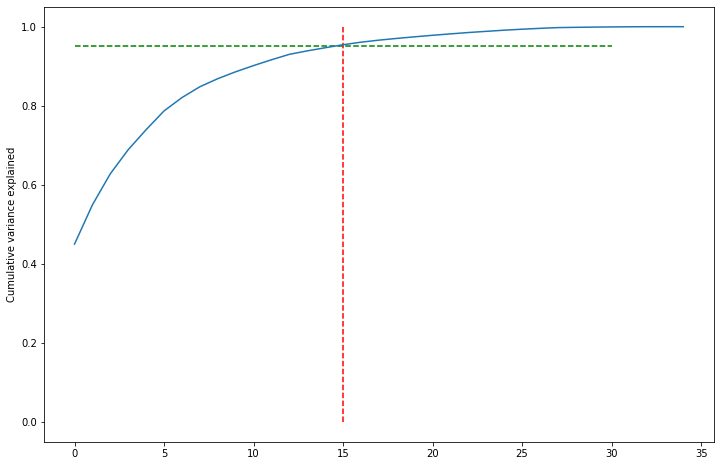

In [158]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

As can be seen from the scree plot that the components which needs to considered is 15.

In [159]:
from sklearn.decomposition import IncrementalPCA

In [160]:
pca_final = IncrementalPCA(n_components=15)

In [161]:
df_train_pca = pca_final.fit_transform(X_train)

In [162]:
df_train_pca.shape

(20785, 15)

In [163]:
# Correlation:

In [164]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [165]:
corrmat.shape

(15, 15)

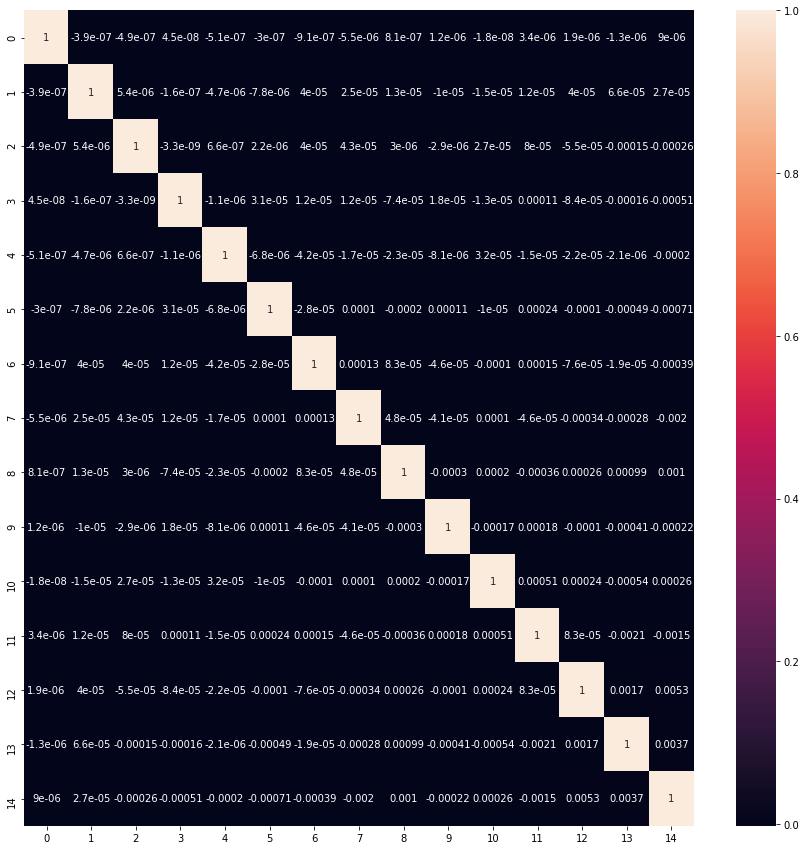

In [166]:
# Plotting the heatmap of the correlation matrix:

plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

In [167]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8909, 15)

# Model 1 using PCA:

### Applying Logistic Regression on the PCA:

In [168]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg_pca= LogisticRegression(class_weight='balanced')


In [169]:
model_logreg_pca= logreg_pca.fit(df_train_pca, y_train)

In [170]:
### Making predictions on the test set:

pred_prob= model_logreg_pca.predict_proba(df_test_pca)

In [171]:
predictions= logreg_pca.predict(df_test_pca)

In [172]:
# Confusion matrix:
cm= metrics.confusion_matrix(y_test,predictions)
print(cm) 

[[6518 1663]
 [ 135  593]]


In [175]:
confusion_tree = metrics.confusion_matrix(y_test,predictions)
TP = confusion_tree[1,1] # true positive 
TN = confusion_tree[0,0] # true negatives
FP = confusion_tree[0,1] # false positives
FN = confusion_tree[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.8145604395604396
Specificity:  0.7967241168561301
false postive rate:  0.20327588314386993
positive predictive value:  0.262854609929078
Negative predictive value:  0.9797084022245603
Misclassification Rate:  0.20181838590189696


# Model 2 Using PCA:

## Decision Tree:

In [176]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [177]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
dt_default.fit(df_train_pca, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [178]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(df_test_pca)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      8181
           1       0.26      0.73      0.38       728

    accuracy                           0.81      8909
   macro avg       0.61      0.77      0.63      8909
weighted avg       0.91      0.81      0.84      8909



In [179]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[6644 1537]
 [ 194  534]]
0.8057020990010102


In [180]:
confusion_tree = confusion_matrix(y_test,y_pred_default)
TP = confusion_tree[1,1] # true positive 
TN = confusion_tree[0,0] # true negatives
FP = confusion_tree[0,1] # false positives
FN = confusion_tree[1,0] # false negatives

print('Acuracy Score', accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Acuracy Score 0.8057020990010102
Sensitivity:  0.7335164835164835
Specificity:  0.8121256570101455
false postive rate:  0.18787434298985453
positive predictive value:  0.25784645098986
Negative predictive value:  0.9716291313249488
Misclassification Rate:  0.19429790099898978


In [181]:
# Finding Optimal Hyperparameters:
# Create the parameter grid 
param_grid = {
    'max_depth': range(1, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(criterion = "gini", class_weight='balanced', random_state = 100)
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search on the training data
grid_search.fit(df_train_pca, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   15.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'c

In [182]:
# Scores of GridSearchCV:

score= grid_search.cv_results_
score_df=pd.DataFrame(score)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.038807,0.001246,0.000719,0.000028,entropy,1,50,50,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.712052,0.679817,0.679096,0.718547,0.710127,0.699928,0.016948,17
1,0.038156,0.001178,0.000707,0.000034,entropy,1,50,100,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.712052,0.679817,0.679096,0.718547,0.710127,0.699928,0.016948,17
2,0.039519,0.002619,0.000812,0.000122,entropy,1,100,50,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.712052,0.679817,0.679096,0.718547,0.710127,0.699928,0.016948,17
3,0.041722,0.003762,0.000792,0.000081,entropy,1,100,100,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.712052,0.679817,0.679096,0.718547,0.710127,0.699928,0.016948,17
4,0.178999,0.006574,0.000891,0.000036,entropy,6,50,50,"{'criterion': 'entropy', 'max_depth': 6, 'min_...",0.816214,0.815011,0.788068,0.829204,0.826317,0.814963,0.014537,1


In [183]:
score_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_criterion', 'param_max_depth', 'param_min_samples_leaf',
       'param_min_samples_split', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [184]:
# printing the optimal accuracy score and hyperparameters

print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8149627134953091
DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=6, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=50,
                       min_samples_split=50, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=100, splitter='best')


In [185]:
# Modelling with optimal hyperparameters:

tuned_tree= DecisionTreeClassifier(class_weight='balanced',
                       random_state = 100,
                       criterion='gini',
                       max_depth=6, 
                       min_samples_leaf=50, 
                       min_samples_split=50
                       )
tuned_tree.fit(df_train_pca,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [186]:
y_pred = tuned_tree.predict(df_test_pca)
confusion_tree_hyper=confusion_matrix(y_test,y_pred)
confusion_tree_hyper

array([[6667, 1514],
       [ 188,  540]])

In [187]:
TP = confusion_tree_hyper[1,1] # true positive 
TN = confusion_tree_hyper[0,0] # true negatives
FP = confusion_tree_hyper[0,1] # false positives
FN = confusion_tree_hyper[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.7417582417582418
Specificity:  0.8149370492604816
false postive rate:  0.1850629507395184
positive predictive value:  0.2629016553067186
Negative predictive value:  0.9725747629467542
Misclassification Rate:  0.1910427657425076


In [188]:
print(accuracy_score(y_test,y_pred))

0.8089572342574924


# Model 3 Using PCA:

## Random Forest:

In [189]:
# Random forest

# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

# fit
rfc.fit(df_train_pca,y_train)

# Making predictions
y_pred_default = rfc.predict(df_test_pca)

In [190]:
confusion_rf=confusion_matrix(y_test,y_pred_default)
confusion_rf

array([[8078,  103],
       [ 591,  137]])

In [191]:
TN = confusion_rf[0,0] # true positive
TP = confusion_rf[1,1] # true negatives
FP = confusion_rf[0,1] # false positives
FN = confusion_rf[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.18818681318681318
Specificity:  0.9874098520963207
false postive rate:  0.012590147903679258
positive predictive value:  0.5708333333333333
Negative predictive value:  0.9318260468335449
Misclassification Rate:  0.07789875406891907


In [192]:
#Hyperparameter tuning using random forest:

#Lets do some hyper parameter tuning 
#GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#specify number of folds for k-fold CV
n_folds = 3
#parameters to build the model on
parameters = {'max_depth': range(2, 40, 2)}
param_grid = {
   'max_depth': [4,8,10],
   'min_samples_leaf': range(100, 400, 200),
   'min_samples_split': range(200, 500, 200),
   'n_estimators': [100,200, 300], 
   'max_features': [5, 10]
}

#instantiate the model
rf_with_pca = RandomForestClassifier(class_weight='balanced')


#fit tree on training data
rf_with_pca = GridSearchCV(rf_with_pca, param_grid=param_grid, 
                   cv=n_folds,n_jobs = -1,
                  scoring="accuracy")
rf_with_pca.fit(df_train_pca, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [193]:
#scores of GridSearch CV
scores = rf_with_pca.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,3.241229,0.013745,0.098594,0.005279,4,5,100,200,100,"{'max_depth': 4, 'max_features': 5, 'min_sampl...",0.843412,0.831553,0.830543,0.835169,0.005843,33
1,6.981479,0.011506,0.162148,0.004374,4,5,100,200,200,"{'max_depth': 4, 'max_features': 5, 'min_sampl...",0.842257,0.837760,0.839348,0.839788,0.001862,18
2,10.568478,0.109268,0.238615,0.003299,4,5,100,200,300,"{'max_depth': 4, 'max_features': 5, 'min_sampl...",0.841103,0.835017,0.834873,0.836998,0.002903,27
3,3.624342,0.094978,0.078700,0.002193,4,5,100,400,100,"{'max_depth': 4, 'max_features': 5, 'min_sampl...",0.839804,0.834873,0.837760,0.837479,0.002023,23
4,6.966539,0.009146,0.162095,0.003510,4,5,100,400,200,"{'max_depth': 4, 'max_features': 5, 'min_sampl...",0.837783,0.830831,0.837471,0.835362,0.003206,31


In [194]:
print("best accuracy", rf_with_pca.best_score_)
print(rf_with_pca.best_estimator_)

best accuracy 0.8531152706251498
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [195]:
#instantiate the model
rf_with_pca_tuned = RandomForestClassifier(class_weight='balanced',max_depth=10,min_samples_leaf=100,
                                          min_samples_split=200,n_estimators=200,max_features=5,
                                          random_state=50,criterion='gini')

In [196]:
#fit
rf_with_pca_tuned.fit(df_train_pca,y_train)

#Making predictions
y_pred_RF = rf_with_pca_tuned.predict(df_test_pca)

In [197]:
confusion_tuned_RF = confusion_matrix(y_test,y_pred_RF)

In [198]:
confusion_tuned_RF

array([[7046, 1135],
       [ 174,  554]])

# Modeling without PCA:

In [199]:
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
import statsmodels.api as sm

In [200]:
data_num.shape

(29694, 37)

In [201]:
data_num.columns

Index(['mobile_number', 'arpu_8', 'onnet_mou_8', 'offnet_mou_8',
       'roam_ic_mou_8', 'roam_og_mou_8', 'isd_og_mou_8', 'total_og_mou_8',
       'total_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_8',
       'max_rech_amt_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'aug_vbc_3g', 'churn',
       'aon_in_mon', 'onnet_mou_good_phase', 'offnet_mou_good_phase',
       'roam_ic_mou_good_phase', 'roam_og_mou_good_phase',
       'total_og_mou_good_phase', 'total_ic_mou_good_phase',
       'total_rech_num_good_phase', 'total_rech_amt_good_phase',
       'max_rech_amt_good_phase', 'last_day_rch_amt_good_phase',
       'vol_2g_mb_good_phase', 'vol_3g_mb_good_phase', 'monthly_2g_good_phase',
       'sachet_2g_good_phase', 'monthly_3g_good_phase', 'vbc_good_phase'],
      dtype='object')

In [202]:
# Copying the dataset for modelling:

df1 = data_num.copy()

In [203]:
df1.shape

(29694, 37)

In [204]:
df1.columns

Index(['mobile_number', 'arpu_8', 'onnet_mou_8', 'offnet_mou_8',
       'roam_ic_mou_8', 'roam_og_mou_8', 'isd_og_mou_8', 'total_og_mou_8',
       'total_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_8',
       'max_rech_amt_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'aug_vbc_3g', 'churn',
       'aon_in_mon', 'onnet_mou_good_phase', 'offnet_mou_good_phase',
       'roam_ic_mou_good_phase', 'roam_og_mou_good_phase',
       'total_og_mou_good_phase', 'total_ic_mou_good_phase',
       'total_rech_num_good_phase', 'total_rech_amt_good_phase',
       'max_rech_amt_good_phase', 'last_day_rch_amt_good_phase',
       'vol_2g_mb_good_phase', 'vol_3g_mb_good_phase', 'monthly_2g_good_phase',
       'sachet_2g_good_phase', 'monthly_3g_good_phase', 'vbc_good_phase'],
      dtype='object')

In [205]:
# Putting feature variable to X
X = df1.drop(['churn','mobile_number'], axis=1)

X.head(15)

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,isd_og_mou_8,total_og_mou_8,total_ic_mou_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,aug_vbc_3g,aon_in_mon,onnet_mou_good_phase,offnet_mou_good_phase,roam_ic_mou_good_phase,roam_og_mou_good_phase,total_og_mou_good_phase,total_ic_mou_good_phase,total_rech_num_good_phase,total_rech_amt_good_phase,max_rech_amt_good_phase,last_day_rch_amt_good_phase,vol_2g_mb_good_phase,vol_3g_mb_good_phase,monthly_2g_good_phase,sachet_2g_good_phase,monthly_3g_good_phase,vbc_good_phase
7,3171.480,52.29,325.91,31.64,38.06,10.01,350.16,428.74,7,3638,1580,779,0.00,0.00,0,0,0,57.74,26.733333,112.52,1020.59,49.72,36.33,1096.77,1184.50,10,2370,2370,0,0.00,0.00,0,0,0,38.12
8,137.362,35.08,136.48,0.00,0.00,0.00,171.56,16.54,14,120,30,10,0.03,11.94,0,3,0,21.03,10.500000,764.72,175.29,0.00,0.00,940.02,132.35,40,1038,244,50,356.00,750.95,1,1,0,1032.81
13,593.260,534.24,482.46,72.11,1.44,1.29,1015.26,1144.53,11,717,130,0,0.02,0.00,0,3,0,0.00,86.900000,610.15,532.59,167.77,43.24,1099.50,1141.19,10,760,220,160,0.00,0.00,0,0,0,0.00
16,187.894,70.61,162.76,0.00,0.00,0.00,233.38,294.46,2,160,130,130,0.00,0.00,0,0,0,0.00,17.033333,124.52,526.03,2.83,17.74,632.82,746.42,16,918,220,200,0.00,0.00,0,0,0,24.34
17,25.499,7.79,5.54,4.81,13.34,0.00,0.00,0.00,4,30,30,0,0.00,0.00,0,0,0,0.00,22.233333,1195.19,61.64,4.76,8.46,1250.34,94.19,21,816,110,30,0.00,0.00,0,0,0,0.00
21,637.760,85.14,983.39,0.00,0.00,0.00,1068.54,261.04,27,718,50,50,0.00,0.00,0,0,0,0.00,24.000000,234.52,1654.61,0.00,0.00,1889.13,338.98,48,1280,100,50,0.00,0.00,0,0,0,0.00
24,354.793,141.11,283.36,13.83,22.93,0.00,403.64,207.86,7,490,130,130,0.00,0.00,0,0,0,0.00,102.400000,179.38,820.81,9.30,9.89,990.31,772.82,10,770,220,220,0.00,0.00,0,0,0,0.00
33,409.230,0.00,0.00,0.00,0.00,0.00,0.56,41.79,1,455,455,455,7.97,7701.01,0,0,1,358.10,44.266667,0.00,0.00,0.00,0.00,0.00,15.08,21,3864,1507,252,144.81,11664.55,0,0,9,4421.50
38,393.909,666.38,97.81,0.00,0.00,0.00,764.19,49.64,6,416,130,130,0.00,0.00,0,0,0,0.00,38.500000,868.95,139.44,0.00,0.00,1008.40,138.73,49,1056,140,40,0.00,0.00,0,0,0,0.00
41,229.769,80.44,136.69,0.00,0.00,0.74,217.14,206.94,3,410,150,110,0.00,0.00,0,0,0,0.00,67.000000,205.27,513.14,0.00,0.00,719.27,753.70,8,1006,300,300,0.00,0.00,0,0,0,0.00


In [206]:
X.columns

Index(['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'isd_og_mou_8', 'total_og_mou_8', 'total_ic_mou_8',
       'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'aug_vbc_3g', 'aon_in_mon',
       'onnet_mou_good_phase', 'offnet_mou_good_phase',
       'roam_ic_mou_good_phase', 'roam_og_mou_good_phase',
       'total_og_mou_good_phase', 'total_ic_mou_good_phase',
       'total_rech_num_good_phase', 'total_rech_amt_good_phase',
       'max_rech_amt_good_phase', 'last_day_rch_amt_good_phase',
       'vol_2g_mb_good_phase', 'vol_3g_mb_good_phase', 'monthly_2g_good_phase',
       'sachet_2g_good_phase', 'monthly_3g_good_phase', 'vbc_good_phase'],
      dtype='object')

In [207]:
# Putting response variable to y
y = df1['churn']

y.head()

7     1
8     0
13    0
16    0
17    0
Name: churn, dtype: int64

In [208]:
# Splitting the data into train and test:

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100, stratify=y)

In [209]:
X_train.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,isd_og_mou_8,total_og_mou_8,total_ic_mou_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,aug_vbc_3g,aon_in_mon,onnet_mou_good_phase,offnet_mou_good_phase,roam_ic_mou_good_phase,roam_og_mou_good_phase,total_og_mou_good_phase,total_ic_mou_good_phase,total_rech_num_good_phase,total_rech_amt_good_phase,max_rech_amt_good_phase,last_day_rch_amt_good_phase,vol_2g_mb_good_phase,vol_3g_mb_good_phase,monthly_2g_good_phase,sachet_2g_good_phase,monthly_3g_good_phase,vbc_good_phase
32696,757.022,121.43,116.93,0.00,0.00,0.0,246.09,184.28,4,528,274,195,102.91,3797.33,1,0,0,3064.74,83.133333,265.54,585.24,0.00,0.00,853.28,533.28,13,1303,824,824,4.56,2530.61,2,0,0,1664.96
68764,292.038,157.34,240.96,0.00,0.00,0.0,401.88,34.01,14,340,50,30,0.00,0.00,0,0,0,0.00,25.500000,359.16,712.12,0.00,0.00,1076.17,141.50,40,792,86,40,0.00,0.00,0,0,0,0.00
61308,169.856,8.48,26.33,0.00,0.00,0.0,34.81,45.41,2,204,154,50,1186.83,0.00,1,0,0,0.00,86.666667,28.82,40.94,0.00,0.00,71.38,73.99,15,886,308,204,2165.82,0.00,3,1,0,0.00
22835,9.587,0.66,2.03,2.11,1.26,0.0,1.43,1.30,5,10,10,0,0.00,0.00,0,0,0,0.00,25.233333,9.15,53.60,4.68,8.28,54.49,42.54,14,799,504,30,1492.77,2672.02,1,0,2,508.74
71182,146.001,21.01,66.74,4.89,64.44,0.0,23.31,17.11,4,160,50,30,0.00,0.00,0,0,0,0.00,16.466667,137.97,398.08,5.01,130.34,405.72,241.57,19,785,170,100,0.00,0.00,0,1,0,0.00


In [210]:
X_train.shape

(20785, 35)

In [211]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X_train[X_train.columns]=scaler.fit_transform(X_train[X_train.columns])

In [212]:
X_train.describe()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,isd_og_mou_8,total_og_mou_8,total_ic_mou_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,aug_vbc_3g,aon_in_mon,onnet_mou_good_phase,offnet_mou_good_phase,roam_ic_mou_good_phase,roam_og_mou_good_phase,total_og_mou_good_phase,total_ic_mou_good_phase,total_rech_num_good_phase,total_rech_amt_good_phase,max_rech_amt_good_phase,last_day_rch_amt_good_phase,vol_2g_mb_good_phase,vol_3g_mb_good_phase,monthly_2g_good_phase,sachet_2g_good_phase,monthly_3g_good_phase,vbc_good_phase
count,20785.000000,20785.000000,20785.000000,20785.000000,20785.000000,20785.000000,20785.000000,20785.000000,20785.000000,20785.000000,20785.000000,20785.000000,20785.000000,20785.000000,20785.000000,20785.000000,20785.000000,20785.000000,20785.000000,20785.000000,20785.000000,20785.000000,20785.000000,20785.000000,20785.000000,20785.000000,20785.000000,20785.000000,20785.000000,20785.000000,20785.000000,20785.000000,20785.000000,20785.000000,20785.000000
mean,0.073340,0.025638,0.027420,0.003178,0.004019,0.000348,0.045062,0.055815,0.052341,0.030328,0.036914,0.021880,0.006358,0.008850,0.023026,0.013917,0.010648,0.017292,0.262773,0.041657,0.050897,0.004984,0.010371,0.075386,0.050213,0.074386,0.017768,0.047866,0.034767,0.010014,0.007187,0.028985,0.018357,0.018328,0.020224
std,0.022867,0.044894,0.034776,0.018213,0.019914,0.007816,0.050312,0.066861,0.048451,0.027211,0.039329,0.033314,0.025312,0.028433,0.071784,0.042379,0.036343,0.051727,0.235480,0.061461,0.052916,0.022604,0.038528,0.066175,0.055820,0.056542,0.023669,0.045669,0.037301,0.032736,0.021937,0.075497,0.055258,0.055563,0.058277
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.061227,0.003152,0.007898,0.000000,0.000000,0.000000,0.013954,0.015261,0.020408,0.015290,0.015060,0.002248,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.072446,0.006948,0.018869,0.000000,0.000000,0.034014,0.016935,0.038710,0.004407,0.028928,0.013289,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.069220,0.009907,0.017968,0.000000,0.000000,0.000000,0.031292,0.036792,0.040816,0.025680,0.029220,0.011238,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.178942,0.019007,0.036083,0.000000,0.000000,0.058761,0.033937,0.058065,0.010935,0.033191,0.026578,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.080026,0.028030,0.034493,0.000000,0.000000,0.000000,0.059473,0.071812,0.066327,0.038961,0.044504,0.029220,0.000924,0.000000,0.000000,0.000000,0.000000,0.000324,0.424052,0.052125,0.064316,0.000974,0.002972,0.096264,0.063439,0.093548,0.023231,0.056334,0.041196,0.003750,0.002552,0.000000,0.000000,0.000000,0.004171
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [213]:
X_test.shape

(8909, 35)

In [214]:
scaler.scale_

array([4.94029359e-05, 9.30011086e-05, 7.13911421e-05, 2.39819080e-04,
       1.87369778e-04, 1.76008617e-04, 7.12095512e-05, 1.87064141e-04,
       5.10204082e-03, 4.90075962e-05, 2.24769611e-04, 2.24769611e-04,
       8.99473898e-05, 3.32933148e-05, 2.00000000e-01, 2.27272727e-02,
       6.25000000e-02, 1.32085914e-04, 7.24462690e-03, 6.82029611e-05,
       6.01337736e-05, 1.63366660e-04, 2.07397022e-04, 5.34918976e-05,
       7.97938765e-05, 3.22580645e-03, 2.72020021e-05, 1.52253350e-04,
       1.66112957e-04, 6.29796292e-05, 1.36359254e-05, 1.11111111e-01,
       1.69491525e-02, 5.26315789e-02, 7.78473041e-05])

In [215]:
#Transform X_test 
X_test[X_test.columns]=scaler.transform(X_test[X_test.columns])

In [216]:
X_test.describe()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,isd_og_mou_8,total_og_mou_8,total_ic_mou_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,aug_vbc_3g,aon_in_mon,onnet_mou_good_phase,offnet_mou_good_phase,roam_ic_mou_good_phase,roam_og_mou_good_phase,total_og_mou_good_phase,total_ic_mou_good_phase,total_rech_num_good_phase,total_rech_amt_good_phase,max_rech_amt_good_phase,last_day_rch_amt_good_phase,vol_2g_mb_good_phase,vol_3g_mb_good_phase,monthly_2g_good_phase,sachet_2g_good_phase,monthly_3g_good_phase,vbc_good_phase
count,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000,8909.00000,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000
mean,0.073244,0.024742,0.027500,0.003288,0.004168,0.000389,0.044411,0.055765,0.053180,0.030091,0.035795,0.020463,0.006080,0.008590,0.022966,0.013980,0.01060,0.016617,0.263270,0.040548,0.051562,0.005306,0.011487,0.074833,0.049612,0.075415,0.018110,0.047905,0.034160,0.009801,0.006871,0.028037,0.019078,0.018509,0.019046
std,0.027475,0.039849,0.031925,0.017392,0.020226,0.008177,0.045451,0.069054,0.048279,0.034338,0.036480,0.030104,0.021584,0.027079,0.071595,0.041447,0.03602,0.050982,0.236417,0.055547,0.053342,0.020822,0.041452,0.063185,0.053494,0.055944,0.032456,0.047285,0.038315,0.030763,0.019367,0.074052,0.060123,0.057902,0.053589
min,0.044507,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.001827,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.061186,0.003076,0.008032,0.000000,0.000000,0.000000,0.013764,0.015266,0.020408,0.015388,0.015060,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.072688,0.006893,0.019523,0.000000,0.000000,0.033916,0.016459,0.038710,0.004461,0.028928,0.013289,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.069045,0.009907,0.017968,0.000000,0.000000,0.000000,0.031876,0.035896,0.040816,0.025386,0.029220,0.011238,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.179908,0.019040,0.036968,0.000000,0.000000,0.059419,0.034269,0.058065,0.010826,0.031973,0.026578,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.079875,0.028180,0.035247,0.000000,0.000000,0.000000,0.060386,0.071167,0.066327,0.038471,0.040234,0.029220,0.000831,0.000000,0.000000,0.000000,0.00000,0.000073,0.424777,0.052477,0.064679,0.001162,0.003366,0.096360,0.063456,0.093548,0.023339,0.056334,0.039867,0.003660,0.002209,0.000000,0.000000,0.000000,0.002968
max,1.703879,0.625320,0.507046,0.594766,0.535973,0.638895,0.548138,1.120647,0.647959,2.221024,0.696786,0.696786,0.432292,0.614893,1.000000,0.750000,0.56250,1.706051,0.969331,0.633276,0.856876,0.423768,0.789137,0.771718,0.737253,0.758065,2.034356,0.939403,1.029900,0.562861,0.429491,0.777778,1.288136,1.210526,1.275230


In [217]:
# Logistic regression model
logm = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20785
Model:                            GLM   Df Residuals:                    20749
Model Family:                Binomial   Df Model:                           35
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3758.4
Date:                Sun, 05 Jul 2020   Deviance:                       7516.7
Time:                        12:28:18   Pearson chi2:                 1.08e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.2490      0.355     -3.515      0.000      -1.945      -0.553
arpu_8                          0.7382      6.979      0.106      0.916     -12.940      14.416
onnet_mou_8                    81.8357      4.775     17.139      0.000      72.477      91.194
offnet_mou_8                   98.8137      5.959     16.582      0.000      87.134     110.494
roam_ic_mou_8                  -0.1815      1.805     -0.101      0.920      -3.718       3.355
roam_og_mou_8                 -32.9250      2.909    -11.318      0.000     -38.627     -27.223
isd_og_mou_8                    8.7102      4.487      1.941      0.052      -0.083      17.504
total_og_mou_8               -116.3923      6.316    -18.429      0.000    -128.771    -104.014
total_ic_mou_8                -27.1252      1.815    -14.945      0.000     -30.682     -23.568
total_rech_num_8               -3.7012      1.511     -2.449      0.014      -6.663      -0.740
total_rech_amt_8              -14.5474      6.307     -2.306      0.021     -26.909      -2.185
max_rech_amt_8                  5.8559      1.690      3.465      0.001       2.543       9.169
last_day_rch_amt_8            -16.7773      1.970     -8.517      0.000     -20.638     -12.916
vol_2g_mb_8                    -8.6172      3.807     -2.264      0.024     -16.078      -1.157
vol_3g_mb_8                     0.7789      3.742      0.208      0.835      -6.556       8.113
monthly_2g_8                   -5.8735      1.164     -5.047      0.000      -8.155      -3.593
sachet_2g_8                    -9.4170      1.820     -5.173      0.000     -12.985      -5.849
monthly_3g_8                  -14.5071      3.119     -4.651      0.000     -20.621      -8.393
aug_vbc_3g                     -2.2132      1.811     -1.222      0.222      -5.762       1.336
aon_in_mon                     -1.3089      0.173     -7.550      0.000      -1.649      -0.969
onnet_mou_good_phase           72.4149      8.718      8.307      0.000      55.328      89.501
offnet_mou_good_phase          82.9762      9.857      8.418      0.000      63.657     102.296
roam_ic_mou_good_phase          2.1447      1.566      1.369      0.171      -0.925       5.215
roam_og_mou_good_phase        -20.9486      3.032     -6.908      0.000     -26.892     -15.005
total_og_mou_good_phase       -89.0218     11.125     -8.002      0.000    -110.827     -67.217
total_ic_mou_good_phase         9.0506      1.048      8.638      0.000       6.997      11.104
total_rech_num_good_phase       0.9046      0.793      1.140      0.254      -0.650       2.459
total_rech_amt_good_phase      12.9365      3.391      3.814      0.000       6.289      19.584
max_rech_amt_good_phase         0.0964      1.275      0.076      0.940      -2.402       2.595
last_day_rc

In [218]:
# Feature Selection using RFE:

from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression(class_weight='balanced')

In [219]:
# Lets use Gridsearch to find the number of features using RFECV
from sklearn.feature_selection import RFECV
rfe_lr = LogisticRegression(class_weight='balanced')
rfe_cv = RFECV(estimator = rfe_lr, step =1 ,cv=None,scoring="neg_mean_absolute_error") #cv = None defaults to KFold =5
rfe_cv.fit(X_train,y_train)

RFECV(cv=None,
      estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=100,
                                   multi_class='auto', n_jobs=None,
                                   penalty='l2', random_state=None,
                                   solver='lbfgs', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='neg_mean_absolute_error',
      step=1, verbose=0)

In [220]:
rfe_cv.n_features_

21

In [221]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 21)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [222]:
rfe.support_

array([ True, False, False,  True,  True, False,  True,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False])

In [223]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_8', True, 1),
 ('onnet_mou_8', False, 13),
 ('offnet_mou_8', False, 7),
 ('roam_ic_mou_8', True, 1),
 ('roam_og_mou_8', True, 1),
 ('isd_og_mou_8', False, 9),
 ('total_og_mou_8', True, 1),
 ('total_ic_mou_8', True, 1),
 ('total_rech_num_8', True, 1),
 ('total_rech_amt_8', True, 1),
 ('max_rech_amt_8', False, 2),
 ('last_day_rch_amt_8', True, 1),
 ('vol_2g_mb_8', True, 1),
 ('vol_3g_mb_8', False, 4),
 ('monthly_2g_8', True, 1),
 ('sachet_2g_8', True, 1),
 ('monthly_3g_8', True, 1),
 ('aug_vbc_3g', True, 1),
 ('aon_in_mon', False, 3),
 ('onnet_mou_good_phase', True, 1),
 ('offnet_mou_good_phase', True, 1),
 ('roam_ic_mou_good_phase', False, 5),
 ('roam_og_mou_good_phase', True, 1),
 ('total_og_mou_good_phase', True, 1),
 ('total_ic_mou_good_phase', True, 1),
 ('total_rech_num_good_phase', True, 1),
 ('total_rech_amt_good_phase', True, 1),
 ('max_rech_amt_good_phase', True, 1),
 ('last_day_rch_amt_good_phase', False, 10),
 ('vol_2g_mb_good_phase', False, 15),
 ('vol_3g_mb_good_pha

In [224]:
col = X_train.columns[rfe.support_]

In [225]:
# Columns selected after RFE:

col

Index(['arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'total_og_mou_8',
       'total_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_8', 'aug_vbc_3g', 'onnet_mou_good_phase',
       'offnet_mou_good_phase', 'roam_og_mou_good_phase',
       'total_og_mou_good_phase', 'total_ic_mou_good_phase',
       'total_rech_num_good_phase', 'total_rech_amt_good_phase',
       'max_rech_amt_good_phase'],
      dtype='object')

In [226]:
# Assessing the model with StatsModel:
# Model 1:

X_train_sm_1 = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm_1, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20785
Model:                            GLM   Df Residuals:                    20763
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4006.9
Date:                Sun, 05 Jul 2020   Deviance:                       8013.8
Time:                        12:28:33   Pearson chi2:                 1.17e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0617      0.329      0.188      0.851      -0.582       0.706
arpu_8                      -22.5107      6.578     -3.422      0.001     -35.402      -9.619
roam_ic_mou_8                -0.2677      1.527     -0.175      0.861      -3.260       2.725
roam_og_mou_8                 5.7223      1.911      2.994      0.003       1.976       9.469
total_og_mou_8              -12.0788      1.920     -6.291      0.000     -15.842      -8.316
total_ic_mou_8              -35.9810      1.882    -19.115      0.000     -39.670     -32.292
total_rech_num_8             -8.7386      1.508     -5.796      0.000     -11.694      -5.784
total_rech_amt_8              7.0968      5.004      1.418      0.156      -2.712      16.905
last_day_rch_amt_8          -21.9821      2.321     -9.471      0.000     -26.531     -17.433
vol_2g_mb_8                  -7.1013      3.429     -2.071      0.038     -13.822      -0.381
monthly_2g_8                 -6.5800      1.063     -6.191      0.000      -8.663      -4.497
sachet_2g_8                  -7.9616      1.623     -4.905      0.000     -11.143      -4.780
monthly_3g_8                -14.5508      2.533     -5.744      0.000     -19.516      -9.586
aug_vbc_3g                   -2.1796      1.416     -1.539      0.124      -4.956       0.597
onnet_mou_good_phase         72.4708      8.963      8.086      0.000      54.904      90.038
offnet_mou_good_phase        81.5125     10.144      8.035      0.000      61.630     101.395
roam_og_mou_good_phase      -20.3219      3.058     -6.646      0.000     -26.315     -14.329
total_og_mou_good_phase     -89.0725     11.442     -7.785      0.000    -111.499     -66.646
total_ic_mou_good_phase      10.8785      1.036     10.501      0.000       8.848      12.909
total_rech_num_good_phase     2.6705      0.761      3.509      0.000       1.179       4.162
total_rech_amt_good_phase    13.8836      2.970      4.675      0.000       8.063      19.704
max_rech_amt_good_phase       1.6018      0.990      1.618      0.106      -0.339       3.543
=============================================================================================
"""

As can be seen `roam_ic_mou_8` has high p-value>0.05

In [227]:
# Dropping 'roam_ic_mou_8' as both p-value:

col1 = col.drop('roam_ic_mou_8',1)

In [228]:
col1

Index(['arpu_8', 'roam_og_mou_8', 'total_og_mou_8', 'total_ic_mou_8',
       'total_rech_num_8', 'total_rech_amt_8', 'last_day_rch_amt_8',
       'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8',
       'aug_vbc_3g', 'onnet_mou_good_phase', 'offnet_mou_good_phase',
       'roam_og_mou_good_phase', 'total_og_mou_good_phase',
       'total_ic_mou_good_phase', 'total_rech_num_good_phase',
       'total_rech_amt_good_phase', 'max_rech_amt_good_phase'],
      dtype='object')

In [229]:
# Model 2:

X_train_sm_2 = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm_2, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20785
Model:                            GLM   Df Residuals:                    20764
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4006.9
Date:                Sun, 05 Jul 2020   Deviance:                       8013.8
Time:                        12:28:33   Pearson chi2:                 1.18e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0627      0.329      0.191      0.849      -0.581       0.707
arpu_8                      -22.5213      6.578     -3.424      0.001     -35.414      -9.629
roam_og_mou_8                 5.5979      1.779      3.146      0.002       2.111       9.085
total_og_mou_8              -12.0564      1.916     -6.293      0.000     -15.811      -8.301
total_ic_mou_8              -35.9653      1.880    -19.133      0.000     -39.650     -32.281
total_rech_num_8             -8.7418      1.508     -5.798      0.000     -11.697      -5.787
total_rech_amt_8              7.0790      5.004      1.415      0.157      -2.728      16.886
last_day_rch_amt_8          -21.9897      2.322     -9.471      0.000     -26.540     -17.439
vol_2g_mb_8                  -7.1084      3.431     -2.072      0.038     -13.832      -0.385
monthly_2g_8                 -6.5826      1.063     -6.194      0.000      -8.665      -4.500
sachet_2g_8                  -7.9638      1.623     -4.906      0.000     -11.145      -4.782
monthly_3g_8                -14.5654      2.532     -5.751      0.000     -19.529      -9.602
aug_vbc_3g                   -2.1765      1.417     -1.536      0.124      -4.953       0.600
onnet_mou_good_phase         72.4697      8.961      8.087      0.000      54.906      90.034
offnet_mou_good_phase        81.5121     10.142      8.037      0.000      61.633     101.391
roam_og_mou_good_phase      -20.3338      3.057     -6.652      0.000     -26.325     -14.343
total_og_mou_good_phase     -89.0767     11.440     -7.786      0.000    -111.499     -66.654
total_ic_mou_good_phase      10.8613      1.031     10.535      0.000       8.841      12.882
total_rech_num_good_phase     2.6699      0.761      3.508      0.000       1.178       4.162
total_rech_amt_good_phase    13.9101      2.966      4.690      0.000       8.098      19.723
max_rech_amt_good_phase       1.5916      0.989      1.610      0.107      -0.346       3.529
=============================================================================================
"""

In [230]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,total_og_mou_good_phase,2414.61
13,offnet_mou_good_phase,1020.45
12,onnet_mou_good_phase,813.29
14,roam_og_mou_good_phase,27.28
0,arpu_8,18.31
5,total_rech_amt_8,15.13
17,total_rech_num_good_phase,8.15
4,total_rech_num_8,7.68
2,total_og_mou_8,6.64
18,total_rech_amt_good_phase,5.64


High P-Value `total_rech_amt_8` is >0.05. So dropping the feature.

In [231]:
# Dropping 'total_rech_amt_8' has high VIF value:

col2 = col1.drop('total_rech_amt_8',1)

In [232]:
col2

Index(['arpu_8', 'roam_og_mou_8', 'total_og_mou_8', 'total_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'aug_vbc_3g', 'onnet_mou_good_phase',
       'offnet_mou_good_phase', 'roam_og_mou_good_phase',
       'total_og_mou_good_phase', 'total_ic_mou_good_phase',
       'total_rech_num_good_phase', 'total_rech_amt_good_phase',
       'max_rech_amt_good_phase'],
      dtype='object')

In [233]:
# Model 3:

X_train_sm_3 = sm.add_constant(X_train[col2])
logm3 = sm.GLM(y_train,X_train_sm_3, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20785
Model:                            GLM   Df Residuals:                    20765
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4007.9
Date:                Sun, 05 Jul 2020   Deviance:                       8015.8
Time:                        12:28:33   Pearson chi2:                 1.03e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.2117      0.263     -0.805      0.421      -0.727       0.304
arpu_8                      -16.4377      4.937     -3.329      0.001     -26.115      -6.761
roam_og_mou_8                 6.0245      1.772      3.400      0.001       2.552       9.497
total_og_mou_8              -11.7404      1.918     -6.122      0.000     -15.499      -7.982
total_ic_mou_8              -35.8845      1.879    -19.097      0.000     -39.567     -32.202
total_rech_num_8             -8.3168      1.475     -5.640      0.000     -11.207      -5.426
last_day_rch_amt_8          -21.1204      2.250     -9.385      0.000     -25.531     -16.710
vol_2g_mb_8                  -7.0971      3.435     -2.066      0.039     -13.829      -0.365
monthly_2g_8                 -6.5201      1.063     -6.135      0.000      -8.603      -4.437
sachet_2g_8                  -7.9257      1.621     -4.889      0.000     -11.103      -4.748
monthly_3g_8                -14.1967      2.518     -5.639      0.000     -19.132      -9.262
aug_vbc_3g                   -2.1773      1.419     -1.534      0.125      -4.959       0.604
onnet_mou_good_phase         71.8034      8.935      8.036      0.000      54.292      89.315
offnet_mou_good_phase        80.7492     10.112      7.985      0.000      60.929     100.569
roam_og_mou_good_phase      -20.1587      3.051     -6.607      0.000     -26.139     -14.179
total_og_mou_good_phase     -88.3054     11.411     -7.739      0.000    -110.671     -65.940
total_ic_mou_good_phase      10.8620      1.030     10.545      0.000       8.843      12.881
total_rech_num_good_phase     2.5445      0.754      3.374      0.001       1.067       4.022
total_rech_amt_good_phase    14.5128      2.928      4.957      0.000       8.775      20.251
max_rech_amt_good_phase       1.1828      0.943      1.254      0.210      -0.666       3.032
=============================================================================================
"""

As can be seen `total_rech_num_good_phase` has high P-value>5.

In [234]:
# Dropping 'roam_ic_mou_8' has high p-value:

col3 = col2.drop('max_rech_amt_good_phase',1)

In [235]:
# Model 4:

X_train_sm_4 = sm.add_constant(X_train[col3])
logm4= sm.GLM(y_train,X_train_sm_4, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20785
Model:                            GLM   Df Residuals:                    20766
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4008.7
Date:                Sun, 05 Jul 2020   Deviance:                       8017.4
Time:                        12:28:33   Pearson chi2:                 1.22e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.1747      0.261     -0.670      0.503      -0.686       0.336
arpu_8                      -15.6988      4.891     -3.209      0.001     -25.286      -6.112
roam_og_mou_8                 5.9971      1.767      3.394      0.001       2.534       9.460
total_og_mou_8              -11.7353      1.913     -6.133      0.000     -15.485      -7.985
total_ic_mou_8              -35.8827      1.881    -19.078      0.000     -39.569     -32.196
total_rech_num_8             -8.6006      1.465     -5.870      0.000     -11.472      -5.729
last_day_rch_amt_8          -21.4117      2.266     -9.448      0.000     -25.853     -16.970
vol_2g_mb_8                  -7.1142      3.441     -2.068      0.039     -13.858      -0.370
monthly_2g_8                 -6.5460      1.063     -6.159      0.000      -8.629      -4.463
sachet_2g_8                  -7.9190      1.623     -4.879      0.000     -11.100      -4.738
monthly_3g_8                -14.2302      2.519     -5.649      0.000     -19.168      -9.293
aug_vbc_3g                   -2.0552      1.413     -1.454      0.146      -4.825       0.714
onnet_mou_good_phase         72.3221      8.873      8.151      0.000      54.931      89.713
offnet_mou_good_phase        81.3367     10.042      8.100      0.000      61.656     101.018
roam_og_mou_good_phase      -20.4960      3.027     -6.771      0.000     -26.429     -14.563
total_og_mou_good_phase     -89.2213     11.328     -7.876      0.000    -111.425     -67.018
total_ic_mou_good_phase      10.8509      1.031     10.522      0.000       8.830      12.872
total_rech_num_good_phase     2.2388      0.712      3.144      0.002       0.843       3.634
total_rech_amt_good_phase    16.1187      2.588      6.227      0.000      11.046      21.192
=============================================================================================
"""

In [236]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col3].columns
vif['VIF'] = [variance_inflation_factor(X_train[col3].values, i) for i in range(X_train[col3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,total_og_mou_good_phase,2412.84
12,offnet_mou_good_phase,1019.69
11,onnet_mou_good_phase,812.66
13,roam_og_mou_good_phase,27.22
0,arpu_8,8.53
16,total_rech_num_good_phase,6.95
4,total_rech_num_8,6.91
15,total_ic_mou_good_phase,5.55
2,total_og_mou_8,5.50
3,total_ic_mou_8,5.42


As can be seen `total_ic_mou_8` has VIF > 5.

In [237]:
# Dropping 'aug_vbc_3g' has high P value:

col4 = col3.drop('aug_vbc_3g',1)

In [238]:
# Model 5:

X_train_sm_5 = sm.add_constant(X_train[col4])
logm5= sm.GLM(y_train,X_train_sm_5, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20785
Model:                            GLM   Df Residuals:                    20767
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4009.8
Date:                Sun, 05 Jul 2020   Deviance:                       8019.7
Time:                        12:28:34   Pearson chi2:                 1.15e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.1667      0.261     -0.639      0.523      -0.678       0.344
arpu_8                      -16.0292      4.887     -3.280      0.001     -25.607      -6.451
roam_og_mou_8                 5.9328      1.763      3.365      0.001       2.477       9.388
total_og_mou_8              -11.6133      1.909     -6.082      0.000     -15.356      -7.871
total_ic_mou_8              -35.9897      1.881    -19.137      0.000     -39.676     -32.304
total_rech_num_8             -8.5426      1.464     -5.836      0.000     -11.412      -5.674
last_day_rch_amt_8          -21.4863      2.266     -9.483      0.000     -25.927     -17.046
vol_2g_mb_8                  -7.2520      3.481     -2.083      0.037     -14.075      -0.429
monthly_2g_8                 -6.8588      1.041     -6.585      0.000      -8.900      -4.817
sachet_2g_8                  -8.0477      1.621     -4.964      0.000     -11.225      -4.870
monthly_3g_8                -15.5205      2.384     -6.510      0.000     -20.193     -10.848
onnet_mou_good_phase         72.1216      8.887      8.115      0.000      54.703      89.540
offnet_mou_good_phase        81.1241     10.058      8.066      0.000      61.411     100.837
roam_og_mou_good_phase      -20.3685      3.029     -6.724      0.000     -26.306     -14.431
total_og_mou_good_phase     -88.8880     11.343     -7.836      0.000    -111.120     -66.656
total_ic_mou_good_phase      10.8814      1.032     10.549      0.000       8.860      12.903
total_rech_num_good_phase     2.2364      0.712      3.141      0.002       0.841       3.632
total_rech_amt_good_phase    15.8516      2.587      6.127      0.000      10.781      20.923
=============================================================================================
"""

In [239]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs:

vif = pd.DataFrame()
vif['Features'] = X_train[col4].columns
vif['VIF'] = [variance_inflation_factor(X_train[col4].values, i) for i in range(X_train[col4].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,total_og_mou_good_phase,2412.04
11,offnet_mou_good_phase,1019.49
10,onnet_mou_good_phase,812.47
12,roam_og_mou_good_phase,27.21
0,arpu_8,8.49
15,total_rech_num_good_phase,6.95
4,total_rech_num_8,6.91
14,total_ic_mou_good_phase,5.55
2,total_og_mou_8,5.50
3,total_ic_mou_8,5.42


As can be seen we have got all the features with low p-value and low VIF values.

In [240]:
#Drop total_og_mou_good_phase - high VIF value
col5 = col4.drop('total_og_mou_good_phase',1)

In [241]:
# Model 5:

X_train_sm_5 = sm.add_constant(X_train[col5])
logm5= sm.GLM(y_train,X_train_sm_5, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20785
Model:                            GLM   Df Residuals:                    20768
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4038.7
Date:                Sun, 05 Jul 2020   Deviance:                       8077.3
Time:                        12:28:34   Pearson chi2:                 1.11e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.3453      0.257     -1.342      0.180      -0.850       0.159
arpu_8                      -11.9751      4.816     -2.486      0.013     -21.415      -2.536
roam_og_mou_8                 4.9600      1.757      2.823      0.005       1.516       8.404
total_og_mou_8              -12.7259      1.913     -6.653      0.000     -16.475      -8.977
total_ic_mou_8              -36.1337      1.884    -19.178      0.000     -39.827     -32.441
total_rech_num_8             -8.6949      1.455     -5.976      0.000     -11.546      -5.843
last_day_rch_amt_8          -21.8355      2.275     -9.599      0.000     -26.294     -17.377
vol_2g_mb_8                  -7.4526      3.478     -2.143      0.032     -14.270      -0.636
monthly_2g_8                 -6.8428      1.037     -6.599      0.000      -8.875      -4.810
sachet_2g_8                  -8.1794      1.621     -5.045      0.000     -11.357      -5.002
monthly_3g_8                -14.6759      2.351     -6.241      0.000     -19.285     -10.067
onnet_mou_good_phase          2.7774      0.675      4.112      0.000       1.454       4.101
offnet_mou_good_phase         2.6497      0.765      3.465      0.001       1.151       4.149
roam_og_mou_good_phase        2.7894      0.706      3.953      0.000       1.407       4.172
total_ic_mou_good_phase      10.5911      1.028     10.307      0.000       8.577      12.605
total_rech_num_good_phase     1.9294      0.704      2.741      0.006       0.550       3.309
total_rech_amt_good_phase    12.6644      2.532      5.001      0.000       7.701      17.627
=============================================================================================
"""

In [242]:
# drop High P-value vol_2g_mb_8
col6 = col5.drop('vol_2g_mb_8',1)

In [243]:
# Model 6:

X_train_sm_6 = sm.add_constant(X_train[col6])
logm6= sm.GLM(y_train,X_train_sm_6, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20785
Model:                            GLM   Df Residuals:                    20769
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4041.6
Date:                Sun, 05 Jul 2020   Deviance:                       8083.2
Time:                        12:28:34   Pearson chi2:                 1.14e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.3371      0.257     -1.309      0.190      -0.842       0.168
arpu_8                      -12.2381      4.820     -2.539      0.011     -21.685      -2.791
roam_og_mou_8                 4.8675      1.747      2.786      0.005       1.444       8.291
total_og_mou_8              -12.6238      1.906     -6.623      0.000     -16.359      -8.888
total_ic_mou_8              -36.0635      1.883    -19.156      0.000     -39.753     -32.374
total_rech_num_8             -8.7242      1.454     -6.000      0.000     -11.574      -5.874
last_day_rch_amt_8          -21.8140      2.275     -9.587      0.000     -26.274     -17.354
monthly_2g_8                 -7.6333      0.997     -7.657      0.000      -9.587      -5.679
sachet_2g_8                  -9.2995      1.574     -5.908      0.000     -12.385      -6.214
monthly_3g_8                -15.6147      2.341     -6.671      0.000     -20.202     -11.027
onnet_mou_good_phase          2.8073      0.674      4.164      0.000       1.486       4.129
offnet_mou_good_phase         2.6957      0.764      3.528      0.000       1.198       4.193
roam_og_mou_good_phase        2.8061      0.704      3.983      0.000       1.425       4.187
total_ic_mou_good_phase      10.6018      1.027     10.321      0.000       8.589      12.615
total_rech_num_good_phase     1.9102      0.704      2.714      0.007       0.531       3.290
total_rech_amt_good_phase    12.6607      2.531      5.003      0.000       7.701      17.621
=============================================================================================
"""

In [244]:
# drop arpu_8 - high p-value
col7 = col6.drop('arpu_8',1)

In [245]:
# Model 7:

X_train_sm_7 = sm.add_constant(X_train[col7])
logm7= sm.GLM(y_train,X_train_sm_7, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20785
Model:                            GLM   Df Residuals:                    20770
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4045.1
Date:                Sun, 05 Jul 2020   Deviance:                       8090.2
Time:                        12:28:34   Pearson chi2:                 1.72e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.9687      0.069    -13.998      0.000      -1.104      -0.833
roam_og_mou_8                 2.3429      1.453      1.613      0.107      -0.505       5.190
total_og_mou_8              -15.5985      1.513    -10.308      0.000     -18.565     -12.633
total_ic_mou_8              -37.0372      1.853    -19.986      0.000     -40.669     -33.405
total_rech_num_8            -10.0845      1.363     -7.399      0.000     -12.756      -7.413
last_day_rch_amt_8          -23.0513      2.225    -10.360      0.000     -27.413     -18.690
monthly_2g_8                 -7.9048      0.990     -7.985      0.000      -9.845      -5.964
sachet_2g_8                  -9.3303      1.574     -5.928      0.000     -12.415      -6.245
monthly_3g_8                -16.6618      2.288     -7.281      0.000     -21.147     -12.177
onnet_mou_good_phase          3.5014      0.617      5.677      0.000       2.293       4.710
offnet_mou_good_phase         3.4111      0.709      4.813      0.000       2.022       4.800
roam_og_mou_good_phase        3.0401      0.698      4.355      0.000       1.672       4.408
total_ic_mou_good_phase      10.8691      1.020     10.657      0.000       8.870      12.868
total_rech_num_good_phase     2.3021      0.691      3.333      0.001       0.948       3.656
total_rech_amt_good_phase     8.5748      1.897      4.520      0.000       4.856      12.293
=============================================================================================
"""

In [246]:
# drop roam_og_mou_8 high p-value
col8 = col7.drop('roam_og_mou_8',1)

In [247]:
# Model 8:

X_train_sm_8 = sm.add_constant(X_train[col8])
logm8= sm.GLM(y_train,X_train_sm_8, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20785
Model:                            GLM   Df Residuals:                    20771
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4046.4
Date:                Sun, 05 Jul 2020   Deviance:                       8092.7
Time:                        12:28:35   Pearson chi2:                 1.22e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.9782      0.069    -14.194      0.000      -1.113      -0.843
total_og_mou_8              -16.0726      1.488    -10.803      0.000     -18.989     -13.157
total_ic_mou_8              -37.4315      1.843    -20.314      0.000     -41.043     -33.820
total_rech_num_8             -9.4774      1.300     -7.290      0.000     -12.026      -6.929
last_day_rch_amt_8          -22.4289      2.181    -10.285      0.000     -26.703     -18.155
monthly_2g_8                 -7.8713      0.986     -7.984      0.000      -9.804      -5.939
sachet_2g_8                  -9.3973      1.570     -5.987      0.000     -12.474      -6.321
monthly_3g_8                -16.5417      2.278     -7.263      0.000     -21.006     -12.078
onnet_mou_good_phase          3.6123      0.613      5.893      0.000       2.411       4.814
offnet_mou_good_phase         3.5685      0.701      5.088      0.000       2.194       4.943
roam_og_mou_good_phase        3.6596      0.580      6.315      0.000       2.524       4.795
total_ic_mou_good_phase      11.0457      1.016     10.867      0.000       9.053      13.038
total_rech_num_good_phase     2.1258      0.681      3.120      0.002       0.791       3.461
total_rech_amt_good_phase     8.7001      1.890      4.603      0.000       4.996      12.404
=============================================================================================
"""

In [248]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs:

vif = pd.DataFrame()
vif['Features'] = X_train[col8].columns
vif['VIF'] = [variance_inflation_factor(X_train[col8].values, i) for i in range(X_train[col8].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,total_rech_num_good_phase,6.55
2,total_rech_num_8,6.48
10,total_ic_mou_good_phase,5.44
1,total_ic_mou_8,5.34
0,total_og_mou_8,5.14
8,offnet_mou_good_phase,3.65
12,total_rech_amt_good_phase,2.72
7,onnet_mou_good_phase,2.69
3,last_day_rch_amt_8,1.52
5,sachet_2g_8,1.26


In [249]:
# drop total_rech_num_good_phase - high VIF value

col9 = col8.drop('total_rech_num_good_phase',1)

In [250]:
# Model 7:

X_train_sm_9 = sm.add_constant(X_train[col9])
logm9= sm.GLM(y_train,X_train_sm_9, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20785
Model:                            GLM   Df Residuals:                    20772
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4051.3
Date:                Sun, 05 Jul 2020   Deviance:                       8102.5
Time:                        12:28:35   Pearson chi2:                 7.79e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.9040      0.065    -13.989      0.000      -1.031      -0.777
total_og_mou_8              -17.3720      1.439    -12.069      0.000     -20.193     -14.551
total_ic_mou_8              -37.8574      1.842    -20.549      0.000     -41.468     -34.247
total_rech_num_8             -7.2874      1.086     -6.709      0.000      -9.416      -5.158
last_day_rch_amt_8          -23.0914      2.169    -10.645      0.000     -27.343     -18.840
monthly_2g_8                 -8.0097      0.986     -8.124      0.000      -9.942      -6.077
sachet_2g_8                  -9.5564      1.567     -6.097      0.000     -12.628      -6.484
monthly_3g_8                -17.0205      2.280     -7.465      0.000     -21.489     -12.552
onnet_mou_good_phase          4.0622      0.595      6.828      0.000       2.896       5.228
offnet_mou_good_phase         3.9971      0.689      5.798      0.000       2.646       5.348
roam_og_mou_good_phase        3.4366      0.576      5.970      0.000       2.308       4.565
total_ic_mou_good_phase      11.2067      1.015     11.043      0.000       9.218      13.196
total_rech_amt_good_phase     9.6021      1.864      5.151      0.000       5.949      13.256
=============================================================================================
"""

In [251]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs:

vif = pd.DataFrame()
vif['Features'] = X_train[col9].columns
vif['VIF'] = [variance_inflation_factor(X_train[col9].values, i) for i in range(X_train[col9].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,total_ic_mou_good_phase,5.35
1,total_ic_mou_8,5.31
0,total_og_mou_8,4.38
8,offnet_mou_good_phase,3.16
11,total_rech_amt_good_phase,2.69
2,total_rech_num_8,2.51
7,onnet_mou_good_phase,2.29
3,last_day_rch_amt_8,1.52
5,sachet_2g_8,1.25
6,monthly_3g_8,1.18


In [252]:
# drop total_ic_mou_good_phase VIF > 5
col10 = col9.drop('total_ic_mou_good_phase',1)

In [253]:
# Model 7:

X_train_sm_10 = sm.add_constant(X_train[col10])
logm10= sm.GLM(y_train,X_train_sm_10, family = sm.families.Binomial())
res = logm10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20785
Model:                            GLM   Df Residuals:                    20773
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4116.1
Date:                Sun, 05 Jul 2020   Deviance:                       8232.2
Time:                        12:28:35   Pearson chi2:                 1.89e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.7085      0.063    -11.333      0.000      -0.831      -0.586
total_og_mou_8              -20.8158      1.440    -14.457      0.000     -23.638     -17.994
total_ic_mou_8              -28.2962      1.559    -18.149      0.000     -31.352     -25.240
total_rech_num_8             -8.0096      1.090     -7.346      0.000     -10.146      -5.873
last_day_rch_amt_8          -23.8925      2.155    -11.086      0.000     -28.117     -19.668
monthly_2g_8                 -8.0583      0.988     -8.159      0.000      -9.994      -6.122
sachet_2g_8                  -9.5583      1.563     -6.115      0.000     -12.622      -6.495
monthly_3g_8                -17.5846      2.272     -7.739      0.000     -22.038     -13.131
onnet_mou_good_phase          4.4491      0.589      7.554      0.000       3.295       5.603
offnet_mou_good_phase         4.9337      0.677      7.291      0.000       3.607       6.260
roam_og_mou_good_phase        2.5694      0.572      4.489      0.000       1.448       3.691
total_rech_amt_good_phase    12.0603      1.713      7.041      0.000       8.703      15.417
=============================================================================================
"""

In [254]:
vif = pd.DataFrame()
vif['Features'] = X_train[col10].columns
vif['VIF'] = [variance_inflation_factor(X_train[col10].values, i) for i in range(X_train[col10].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,total_og_mou_8,4.12
8,offnet_mou_good_phase,2.97
10,total_rech_amt_good_phase,2.68
2,total_rech_num_8,2.51
7,onnet_mou_good_phase,2.21
1,total_ic_mou_8,1.65
3,last_day_rch_amt_8,1.52
5,sachet_2g_8,1.25
6,monthly_3g_8,1.18
9,roam_og_mou_good_phase,1.13


In [255]:
# Getting the predicted values on the train set:

y_train_pred = res.predict(X_train_sm_10)
y_train_pred[:10]

32696    0.011757
68764    0.132452
61308    0.052505
22835    0.293446
71182    0.286320
8601     0.444405
24736    0.160913
93654    0.022469
1490     0.138024
32171    0.006914
dtype: float64

In [256]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.01175724, 0.13245199, 0.05250522, 0.29344613, 0.28631978,
       0.44440454, 0.16091326, 0.02246882, 0.1380244 , 0.00691446])

In [257]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['Customer'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,Customer
0,0,0.011757,32696
1,0,0.132452,68764
2,0,0.052505,61308
3,0,0.293446,22835
4,0,0.286320,71182


Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0. Since the logistic curve gives you just the probabilities and not the actual classification of 'Churn' and 'Not Churn', we need to find a threshold probability to classify customers as 'Churn' and 'Not Churn'. Here, we choose 0.5 as an arbitrary cutoff wherein if the probability of a particular customer churning is less than 0.5, you'd classify it as 'Not Churn' and if it's greater than 0.5, you'd classify it as 'Churn'. The choice of 0.5 is completely arbitrary.

In [258]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,Customer,predicted
0,0,0.011757,32696,0
1,0,0.132452,68764,0
2,0,0.052505,61308,0
3,0,0.293446,22835,0
4,0,0.286320,71182,0


In [259]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[18920   168]
 [ 1419   278]]


In [260]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9236468607168631


The model has an accuracy of 91%

In [261]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [262]:
# Let's see the sensitivity of our logistic regression model
# Of all the churns how well we have identified correctly.


round(100*TP / float(TP+FN),2)

16.38

In [263]:
# Let us calculate specificity
# It tells of all how we correctly detect.
round(100* TN / float(TN+FP),2)

99.12

In [264]:
# Calculate false postive rate - predicting churned when customer have not churned:
round(100 * FP/ float(TN+FP),2)

0.88

In [265]:
# positive predictive value 
round (100 *TP / float(TP+FP),2)

62.33

In [266]:
# Negative predictive value
round  (100 * TN / float(TN+ FN),2)

93.02

In [267]:
# Plotting the ROC Curve:

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

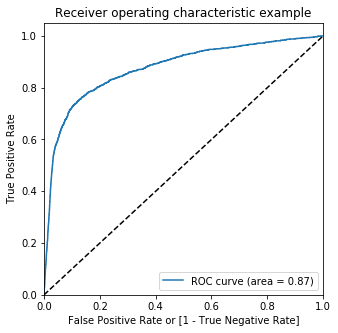

In [268]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

The model looks good as it is away from the diagonal.

In [269]:
# Findin the optimal cutoff probability where we will get balanced sensitivity and specificity:

# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,Customer,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.011757,32696,0,1,0,0,0,0,0,0,0,0,0
1,0,0.132452,68764,0,1,1,0,0,0,0,0,0,0,0
2,0,0.052505,61308,0,1,0,0,0,0,0,0,0,0,0
3,0,0.293446,22835,0,1,1,1,0,0,0,0,0,0,0
4,0,0.286320,71182,0,1,1,1,0,0,0,0,0,0,0


In [270]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.1,0.2,0.3,0.4,0.5,0.6]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.1   0.1  0.822661  0.788450  0.825702
0.2   0.2  0.903007  0.677666  0.923041
0.3   0.3  0.927111  0.576311  0.958298
0.4   0.4  0.929180  0.370654  0.978835
0.5   0.5  0.923647  0.163819  0.991199
0.6   0.6  0.921386  0.080731  0.996123


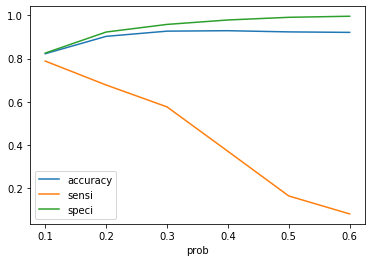

In [271]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

Evaluating the model with optimal probability cutoff as 0.1

In [272]:
# From the above plot we get to know that 0.15 is the optimum point to take it as a cut-off
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,Customer,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.011757,32696,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.132452,68764,0,1,1,0,0,0,0,0,0,0,0,1
2,0,0.052505,61308,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.293446,22835,0,1,1,1,0,0,0,0,0,0,0,1
4,0,0.286320,71182,0,1,1,1,0,0,0,0,0,0,0,1


In [273]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.8226605725282655

In [274]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[15761,  3327],
       [  359,  1338]])

In [275]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [276]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.788450206246317

In [277]:
# Let us calculate specificity
TN / float(TN+FP)

0.8257020117351216

In [278]:
# Positive predictive value 
print (TP / float(TP+FP))

0.2868167202572347


In [279]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9777295285359802


In [280]:
# Precision:

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6233183856502242

In [281]:
#Recall

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.16381850324101355

In [282]:
from sklearn.metrics import precision_score, recall_score

In [283]:
precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.6233183856502242

In [284]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.16381850324101355

In [285]:
# Precision and Recall Tradeoff:

from sklearn.metrics import precision_recall_curve
y_train_pred_final.Churn, y_train_pred_final.predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

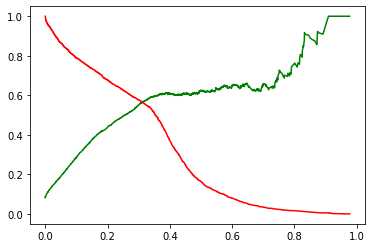

In [286]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [287]:
X_test[['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'isd_og_mou_8', 'total_og_mou_8', 'total_ic_mou_8',
       'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'aug_vbc_3g', 'aon_in_mon',
       'onnet_mou_good_phase', 'offnet_mou_good_phase',
       'roam_ic_mou_good_phase', 'roam_og_mou_good_phase',
       'total_og_mou_good_phase', 'total_ic_mou_good_phase',
       'total_rech_num_good_phase', 'total_rech_amt_good_phase',
       'max_rech_amt_good_phase', 'last_day_rch_amt_good_phase',
       'vol_2g_mb_good_phase', 'vol_3g_mb_good_phase', 'monthly_2g_good_phase',
       'sachet_2g_good_phase', 'monthly_3g_good_phase', 'vbc_good_phase']]=scaler.transform(X_test[['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'isd_og_mou_8', 'total_og_mou_8', 'total_ic_mou_8',
       'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'aug_vbc_3g', 'aon_in_mon',
       'onnet_mou_good_phase', 'offnet_mou_good_phase',
       'roam_ic_mou_good_phase', 'roam_og_mou_good_phase',
       'total_og_mou_good_phase', 'total_ic_mou_good_phase',
       'total_rech_num_good_phase', 'total_rech_amt_good_phase',
       'max_rech_amt_good_phase', 'last_day_rch_amt_good_phase',
       'vol_2g_mb_good_phase', 'vol_3g_mb_good_phase', 'monthly_2g_good_phase',
       'sachet_2g_good_phase', 'monthly_3g_good_phase', 'vbc_good_phase']])

In [288]:
X_test = X_test[col10]
X_test.head()

,total_og_mou_8,total_ic_mou_8,total_rech_num_8,last_day_rch_amt_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,onnet_mou_good_phase,offnet_mou_good_phase,roam_og_mou_good_phase,total_rech_amt_good_phase
10759,9.335039e-06,0.000007,0.000364,0.000007,0.00,0.0,0.0,6.333446e-06,3.467595e-06,0.000001,-0.020075
21712,1.720827e-06,0.000005,0.000208,0.000000,0.12,0.0,0.0,1.376840e-06,2.084520e-06,0.000020,-0.020074
48252,3.975203e-06,0.000002,0.000390,0.000001,0.00,0.0,0.0,6.066534e-06,1.563951e-07,0.000000,-0.020075
73606,7.942445e-06,0.000005,0.000937,0.000002,0.00,0.0,0.0,2.068772e-06,4.434894e-06,0.000000,-0.020075
74265,9.514342e-07,0.000005,0.000000,0.000000,0.00,0.0,0.0,2.784939e-07,4.718358e-06,0.000000,-0.020075


In [289]:
X_test_sm = sm.add_constant(X_test)

In [290]:
# Making prediction on the test set:
y_test_pred = res.predict(X_test_sm)

In [291]:
y_test_pred[:10]

10759    0.278078
21712    0.127932
48252    0.278108
73606    0.277194
74265    0.278741
91761    0.278504
933      0.278685
7274     0.277260
3202     0.278264
95425    0.278254
dtype: float64

In [292]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [293]:
# Let's see the head
y_pred_1.head()

,0
10759,0.278078
21712,0.127932
48252,0.278108
73606,0.277194
74265,0.278741


In [294]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [295]:
#Putting Lead Number to index
y_test_df['Customer Number'] = y_test_df.index

In [296]:
# Removing index for both dataframes to append them side by side 
y_test_df.reset_index(drop=True, inplace=True)
y_pred_1.reset_index(drop=True, inplace=True)

In [297]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [298]:
y_pred_final.head()

,churn,Customer Number,0
0,0,10759,0.278078
1,0,21712,0.127932
2,0,48252,0.278108
3,0,73606,0.277194
4,0,74265,0.278741


In [299]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [300]:
# Let's see the head of y_pred_final
y_pred_final.head()

,churn,Customer Number,Churn_Prob
0,0,10759,0.278078
1,0,21712,0.127932
2,0,48252,0.278108
3,0,73606,0.277194
4,0,74265,0.278741


In [301]:
# Creating predicted column with 0.2 probability cutoff
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.2 else 0)

In [302]:
y_pred_final.head()

,churn,Customer Number,Churn_Prob,final_predicted
0,0,10759,0.278078,1
1,0,21712,0.127932,0
2,0,48252,0.278108,1
3,0,73606,0.277194,1
4,0,74265,0.278741,1


In [303]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted)

0.094623414524638

In [304]:
confusion3 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted )
confusion3

array([[ 115, 8066],
       [   0,  728]])

In [305]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [306]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.788450206246317

In [307]:
# Let us calculate specificity
TN / float(TN+FP)

0.8257020117351216

In [308]:
# Selecting the coefficients of the selected features from our final model excluding the intercept

pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

total_og_mou_8              -20.82
total_ic_mou_8              -28.30
total_rech_num_8             -8.01
last_day_rch_amt_8          -23.89
monthly_2g_8                 -8.06
sachet_2g_8                  -9.56
monthly_3g_8                -17.58
onnet_mou_good_phase          4.45
offnet_mou_good_phase         4.93
roam_og_mou_good_phase        2.57
total_rech_amt_good_phase    12.06
dtype: float64

In [309]:
# Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

total_og_mou_8              -172.60
total_ic_mou_8              -234.62
total_rech_num_8             -66.41
last_day_rch_amt_8          -198.11
monthly_2g_8                 -66.82
sachet_2g_8                  -79.25
monthly_3g_8                -145.81
onnet_mou_good_phase          36.89
offnet_mou_good_phase         40.91
roam_og_mou_good_phase        21.30
total_rech_amt_good_phase    100.00
dtype: float64

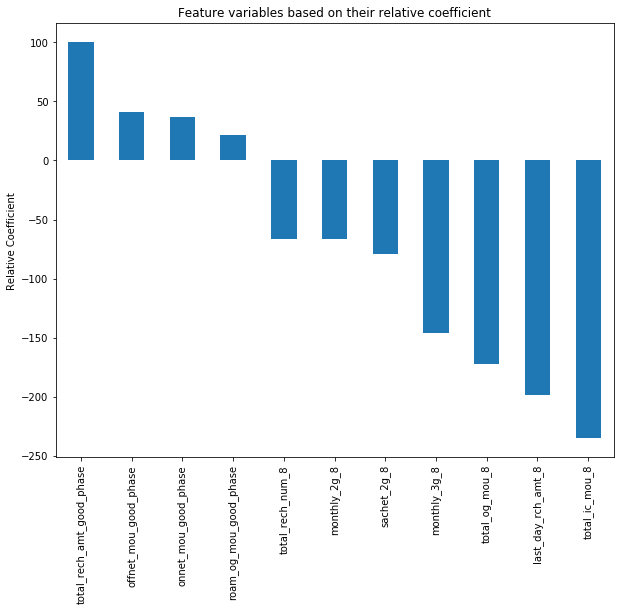

In [310]:
# Plot showing the feature variables based on their relative coefficient values
plt.figure(figsize = (10,8))
feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature variables based on their relative coefficient')
plt.ylabel('Relative Coefficient')
plt.show()

In [311]:
# Selecting Top 5 features which contribute most towards the probability of a customer getting churned:

pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=True).head(5)

,index,0
1,total_ic_mou_8,-234.62
3,last_day_rch_amt_8,-198.11
0,total_og_mou_8,-172.60
6,monthly_3g_8,-145.81
5,sachet_2g_8,-79.25


The features that needs to improved are: the total outgoing minutes of call for the action phase, last day recharge amount for the action phase, monthly 3G data recharge for the action phase, small recharges done for 2G data for the action phase, and the total recharge number for the action phase.
    

In [312]:
# Selecting Top 5 features which contribute most towards the probability of a customer getting not churned:

pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(5)

,index,0
10,total_rech_amt_good_phase,100.00
8,offnet_mou_good_phase,40.91
7,onnet_mou_good_phase,36.89
9,roam_og_mou_good_phase,21.30
2,total_rech_num_8,-66.41


The features which the telecom company can improvise are: the total recharge amount done in the good phase, onnet recharge done for good phase, roaming outgoing call for the good phase, roaming outgoing call for the action phase, offnet done in good phase, total incoming minutes of call for good phase.

# Random Forest Classification Model:

In [313]:
data_num.shape

(29694, 37)

In [314]:
data_num.columns

Index(['mobile_number', 'arpu_8', 'onnet_mou_8', 'offnet_mou_8',
       'roam_ic_mou_8', 'roam_og_mou_8', 'isd_og_mou_8', 'total_og_mou_8',
       'total_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_8',
       'max_rech_amt_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'aug_vbc_3g', 'churn',
       'aon_in_mon', 'onnet_mou_good_phase', 'offnet_mou_good_phase',
       'roam_ic_mou_good_phase', 'roam_og_mou_good_phase',
       'total_og_mou_good_phase', 'total_ic_mou_good_phase',
       'total_rech_num_good_phase', 'total_rech_amt_good_phase',
       'max_rech_amt_good_phase', 'last_day_rch_amt_good_phase',
       'vol_2g_mb_good_phase', 'vol_3g_mb_good_phase', 'monthly_2g_good_phase',
       'sachet_2g_good_phase', 'monthly_3g_good_phase', 'vbc_good_phase'],
      dtype='object')

In [315]:
# Splitting the dependent and the independent variable:
df2 =data_num.copy()



In [316]:
# Putting feature variable to X
X = df2.drop(['churn','mobile_number'], axis=1)

X.head(15)

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,isd_og_mou_8,total_og_mou_8,total_ic_mou_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,aug_vbc_3g,aon_in_mon,onnet_mou_good_phase,offnet_mou_good_phase,roam_ic_mou_good_phase,roam_og_mou_good_phase,total_og_mou_good_phase,total_ic_mou_good_phase,total_rech_num_good_phase,total_rech_amt_good_phase,max_rech_amt_good_phase,last_day_rch_amt_good_phase,vol_2g_mb_good_phase,vol_3g_mb_good_phase,monthly_2g_good_phase,sachet_2g_good_phase,monthly_3g_good_phase,vbc_good_phase
7,3171.48,52.29,325.91,31.64,38.06,10.01,350.16,428.74,7,3638,1580,779,0.00,0.00,0,0,0,57.74,26.73,112.52,1020.59,49.72,36.33,1096.77,1184.50,10,2370,2370,0,0.00,0.00,0,0,0,38.12
8,137.36,35.08,136.48,0.00,0.00,0.00,171.56,16.54,14,120,30,10,0.03,11.94,0,3,0,21.03,10.50,764.72,175.29,0.00,0.00,940.02,132.35,40,1038,244,50,356.00,750.95,1,1,0,1032.81
13,593.26,534.24,482.46,72.11,1.44,1.29,1015.26,1144.53,11,717,130,0,0.02,0.00,0,3,0,0.00,86.90,610.15,532.59,167.77,43.24,1099.50,1141.19,10,760,220,160,0.00,0.00,0,0,0,0.00
16,187.89,70.61,162.76,0.00,0.00,0.00,233.38,294.46,2,160,130,130,0.00,0.00,0,0,0,0.00,17.03,124.52,526.03,2.83,17.74,632.82,746.42,16,918,220,200,0.00,0.00,0,0,0,24.34
17,25.50,7.79,5.54,4.81,13.34,0.00,0.00,0.00,4,30,30,0,0.00,0.00,0,0,0,0.00,22.23,1195.19,61.64,4.76,8.46,1250.34,94.19,21,816,110,30,0.00,0.00,0,0,0,0.00
21,637.76,85.14,983.39,0.00,0.00,0.00,1068.54,261.04,27,718,50,50,0.00,0.00,0,0,0,0.00,24.00,234.52,1654.61,0.00,0.00,1889.13,338.98,48,1280,100,50,0.00,0.00,0,0,0,0.00
24,354.79,141.11,283.36,13.83,22.93,0.00,403.64,207.86,7,490,130,130,0.00,0.00,0,0,0,0.00,102.40,179.38,820.81,9.30,9.89,990.31,772.82,10,770,220,220,0.00,0.00,0,0,0,0.00
33,409.23,0.00,0.00,0.00,0.00,0.00,0.56,41.79,1,455,455,455,7.97,7701.01,0,0,1,358.10,44.27,0.00,0.00,0.00,0.00,0.00,15.08,21,3864,1507,252,144.81,11664.55,0,0,9,4421.50
38,393.91,666.38,97.81,0.00,0.00,0.00,764.19,49.64,6,416,130,130,0.00,0.00,0,0,0,0.00,38.50,868.95,139.44,0.00,0.00,1008.40,138.73,49,1056,140,40,0.00,0.00,0,0,0,0.00
41,229.77,80.44,136.69,0.00,0.00,0.74,217.14,206.94,3,410,150,110,0.00,0.00,0,0,0,0.00,67.00,205.27,513.14,0.00,0.00,719.27,753.70,8,1006,300,300,0.00,0.00,0,0,0,0.00


In [317]:
y= df2['churn']
y.head()

7     1
8     0
13    0
16    0
17    0
Name: churn, dtype: int64

In [318]:
# Splitting the data into train and test:

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100, stratify=y)

In [319]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

In [320]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [321]:
# Making predictions
predictions = rfc.predict(X_test)

In [322]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8181
           1       0.72      0.41      0.52       728

    accuracy                           0.94      8909
   macro avg       0.84      0.70      0.74      8909
weighted avg       0.93      0.94      0.93      8909



In [323]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[8068  113]
 [ 431  297]]


In [324]:
print(accuracy_score(y_test,predictions))

0.9389381524301268


#### Hyperparameter Tuning:

In [325]:
# GridSearchCV to find optimal max_depth:

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [326]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.74,0.02,0.02,0.00,2,{'max_depth': 2},0.89,0.89,0.89,0.89,0.90,0.89,0.00,4,0.89,0.89,0.89,0.89,0.89,0.89,0.00
1,1.81,0.03,0.03,0.00,7,{'max_depth': 7},0.91,0.91,0.90,0.91,0.90,0.90,0.00,3,0.92,0.92,0.92,0.92,0.92,0.92,0.00
2,2.53,0.01,0.04,0.00,12,{'max_depth': 12},0.94,0.94,0.93,0.94,0.94,0.94,0.00,2,0.97,0.97,0.97,0.97,0.97,0.97,0.00
3,2.75,0.03,0.05,0.00,17,{'max_depth': 17},0.94,0.95,0.94,0.94,0.94,0.94,0.00,1,0.99,0.99,0.99,0.99,0.99,0.99,0.00


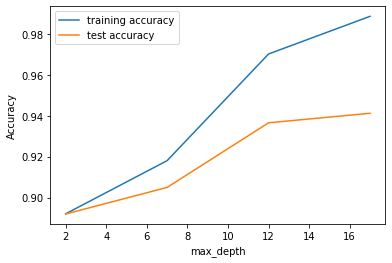

In [327]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

We can say that the optimal value for max_depth is 12.

In [328]:
# Tuning for n_estimators:

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note: we are specifying the optimal value of max_depth to avoid overfitting)
rf = RandomForestClassifier(class_weight='balanced', max_depth= 12)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=12,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              r

In [329]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.53,0.04,0.04,0.00,100,{'n_estimators': 100},0.94,0.94,0.93,0.94,0.93,0.94,0.00,4,0.97,0.97,0.97,0.97,0.97,0.97,0.00
1,12.46,0.12,0.20,0.00,500,{'n_estimators': 500},0.94,0.94,0.93,0.94,0.94,0.94,0.00,1,0.97,0.97,0.97,0.97,0.97,0.97,0.00
2,22.41,0.13,0.36,0.01,900,{'n_estimators': 900},0.94,0.94,0.93,0.94,0.93,0.94,0.00,3,0.97,0.97,0.97,0.97,0.97,0.97,0.00
3,31.93,0.51,0.53,0.02,1300,{'n_estimators': 1300},0.94,0.94,0.93,0.94,0.94,0.94,0.00,2,0.97,0.97,0.97,0.97,0.97,0.97,0.00


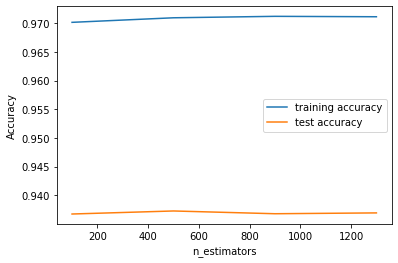

In [330]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [331]:
# Finding optimal values for max_feature:

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=12, class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=12,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              r

In [332]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.01,0.02,0.04,0.00,4,{'max_features': 4},0.94,0.94,0.93,0.94,0.93,0.94,0.00,5,0.97,0.97,0.97,0.97,0.97,0.97,0.00
1,3.71,0.03,0.04,0.00,8,{'max_features': 8},0.94,0.94,0.93,0.94,0.94,0.94,0.00,1,0.97,0.97,0.97,0.97,0.97,0.97,0.00
2,6.30,0.06,0.04,0.00,14,{'max_features': 14},0.94,0.94,0.93,0.94,0.93,0.94,0.00,2,0.97,0.97,0.97,0.97,0.97,0.97,0.00
3,8.95,0.07,0.04,0.00,20,{'max_features': 20},0.94,0.94,0.93,0.94,0.93,0.94,0.00,3,0.97,0.97,0.97,0.97,0.97,0.97,0.00
4,10.57,0.07,0.04,0.00,24,{'max_features': 24},0.94,0.94,0.93,0.94,0.93,0.94,0.00,4,0.97,0.97,0.97,0.97,0.97,0.97,0.00


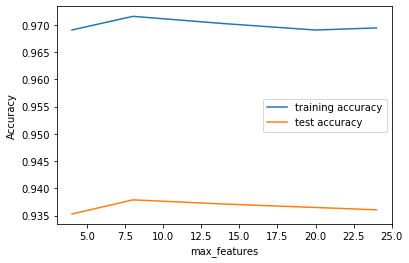

In [333]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [334]:
# Finding optimal values for min_samples_leaf:

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [335]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.91,0.02,0.04,0.00,100,{'min_samples_leaf': 100},0.88,0.88,0.87,0.88,0.88,0.88,0.00,1,0.89,0.88,0.88,0.89,0.89,0.89,0.00
1,1.77,0.01,0.04,0.00,150,{'min_samples_leaf': 150},0.87,0.87,0.87,0.87,0.87,0.87,0.00,2,0.87,0.88,0.88,0.88,0.88,0.88,0.00
2,1.65,0.02,0.03,0.00,200,{'min_samples_leaf': 200},0.87,0.87,0.87,0.87,0.87,0.87,0.00,3,0.87,0.87,0.87,0.88,0.87,0.87,0.00
3,1.57,0.01,0.03,0.00,250,{'min_samples_leaf': 250},0.86,0.86,0.86,0.87,0.86,0.86,0.00,4,0.87,0.86,0.86,0.87,0.87,0.87,0.00
4,1.51,0.01,0.03,0.00,300,{'min_samples_leaf': 300},0.87,0.87,0.86,0.86,0.86,0.86,0.00,5,0.86,0.87,0.86,0.87,0.86,0.86,0.00


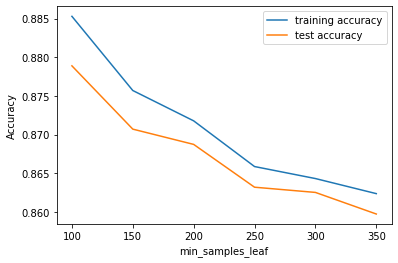

In [336]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [337]:
# Tuning min_samples_split:

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [338]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.37,0.03,0.04,0.00,200,{'min_samples_split': 200},0.89,0.89,0.89,0.89,0.89,0.89,0.00,1,0.90,0.90,0.90,0.91,0.90,0.90,0.00
1,2.26,0.03,0.04,0.00,250,{'min_samples_split': 250},0.89,0.89,0.88,0.89,0.89,0.89,0.00,2,0.89,0.89,0.89,0.89,0.90,0.89,0.00
2,2.23,0.04,0.04,0.00,300,{'min_samples_split': 300},0.88,0.88,0.87,0.88,0.88,0.88,0.00,3,0.88,0.89,0.89,0.89,0.89,0.89,0.00
3,2.20,0.03,0.04,0.00,350,{'min_samples_split': 350},0.88,0.88,0.87,0.88,0.87,0.88,0.00,4,0.88,0.88,0.88,0.89,0.88,0.88,0.00
4,2.17,0.04,0.04,0.00,400,{'min_samples_split': 400},0.87,0.87,0.87,0.88,0.87,0.87,0.00,5,0.88,0.88,0.88,0.88,0.88,0.88,0.00


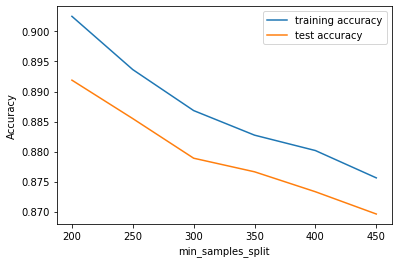

In [339]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Grid search to find optimal values:

In [340]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10,12],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1, return_train_score=True)

In [341]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:  4.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [342]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8871780053619851 using {'max_depth': 4, 'max_features': 5, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [343]:
# model with the best hyperparameters:

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=5,
                             n_estimators=200,class_weight='balanced')

In [344]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=4, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [345]:
# Print the name and gini importance of each feature:

for feature in zip(X_train, rfc.feature_importances_):
    print(feature)

('arpu_8', 0.13227067559604624)
('onnet_mou_8', 0.0085009471314507)
('offnet_mou_8', 0.02614980774072094)
('roam_ic_mou_8', 0.07890641444794493)
('roam_og_mou_8', 0.06811498310297631)
('isd_og_mou_8', 0.00018082068809109318)
('total_og_mou_8', 0.12499768400819715)
('total_ic_mou_8', 0.16428141182646133)
('total_rech_num_8', 0.026866066965952874)
('total_rech_amt_8', 0.113493248096353)
('max_rech_amt_8', 0.07355425199756603)
('last_day_rch_amt_8', 0.09664704458880496)
('vol_2g_mb_8', 0.02679675830316491)
('vol_3g_mb_8', 0.012116871100794038)
('monthly_2g_8', 0.0022088686203895784)
('sachet_2g_8', 0.0014918356126174459)
('monthly_3g_8', 0.001364617641721263)
('aug_vbc_3g', 0.0032045618869988575)
('aon_in_mon', 0.010443313469525999)
('onnet_mou_good_phase', 0.0015795969541642701)
('offnet_mou_good_phase', 0.0010163262218447521)
('roam_ic_mou_good_phase', 0.003366975987842429)
('roam_og_mou_good_phase', 0.0020493664251070055)
('total_og_mou_good_phase', 0.0025779775431461764)
('total_ic_mo

In [377]:
df_RF_final = pd.DataFrame(zip(X_train, rfc.feature_importances_))

In [379]:
df_RF_final.columns = ['Feature','Importance']

In [380]:
df_RF_final.head()

,Feature,Importance
0,arpu_8,0.13
1,onnet_mou_8,0.01
2,offnet_mou_8,0.03
3,roam_ic_mou_8,0.08
4,roam_og_mou_8,0.07


In [409]:
# Lets sort the features by Importance !
df_RF_final.sort_values(by='Importance',ascending=False)

,Feature,Importance
7,total_ic_mou_8,0.16
0,arpu_8,0.13
6,total_og_mou_8,0.12
9,total_rech_amt_8,0.11
11,last_day_rch_amt_8,0.10
3,roam_ic_mou_8,0.08
10,max_rech_amt_8,0.07
4,roam_og_mou_8,0.07
8,total_rech_num_8,0.03
12,vol_2g_mb_8,0.03


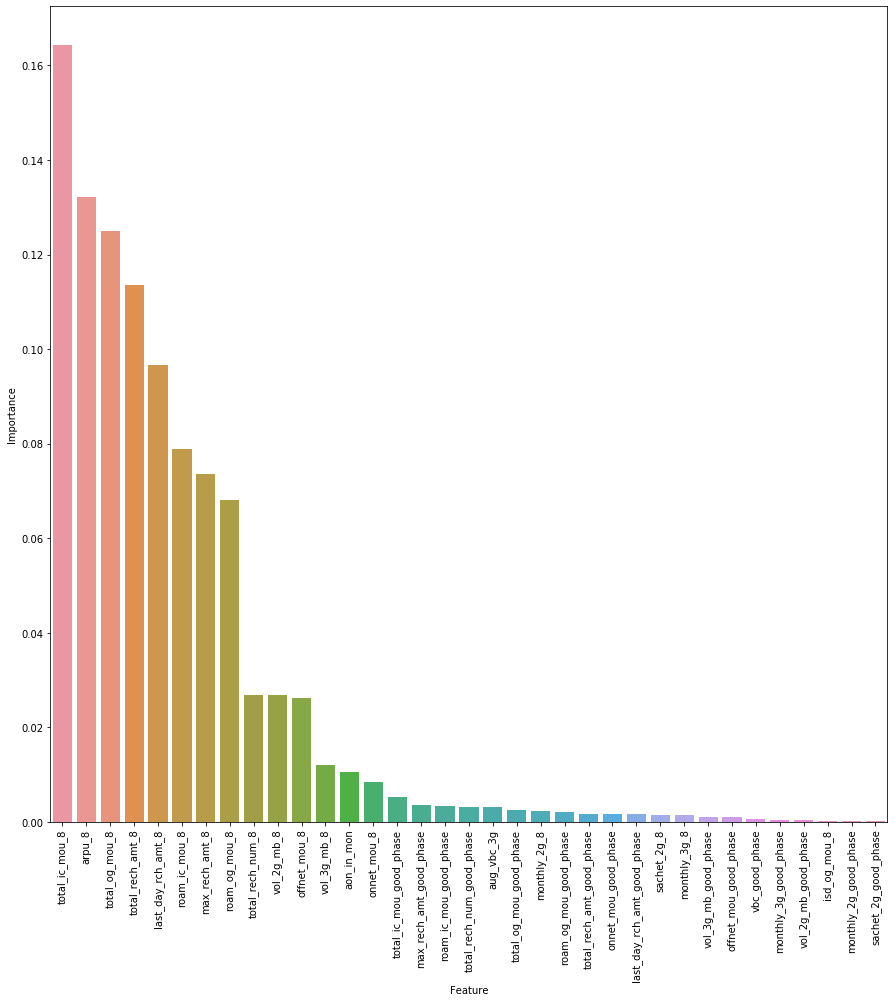

In [457]:
plt.figure(figsize=(15,15))
g = sns.barplot(data=df_RF_final,x='Feature',y='Importance',
                order=df_RF_final.sort_values('Importance',ascending=False).Feature)
plt.xticks(rotation=90)
plt.show()

In [346]:
from sklearn.feature_selection import SelectFromModel 

In [373]:
# Original dataset:
y_pred = rfc.predict(X_test)

# View The Accuracy Of Our Model
accuracy_score(y_test, y_pred)

0.8833763609832753

In [375]:
# Printing confusion matrix:

confusion_matrix= metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[7300  881]
 [ 158  570]]


In [376]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.782967032967033
Specificity:  0.892311453367559
false postive rate:  0.10768854663244103
positive predictive value:  0.3928325292901447
Negative predictive value:  0.9788146956288549
Misclassification Rate:  0.11662363901672466


In [497]:
features_in_RF = df_RF_final.loc[df_RF_final['Importance']>=0.01]

In [498]:
print(features_in_RF.sort_values(by='Importance',ascending=False))

               Feature  Importance
7       total_ic_mou_8        0.16
0               arpu_8        0.13
6       total_og_mou_8        0.12
9     total_rech_amt_8        0.11
11  last_day_rch_amt_8        0.10
3        roam_ic_mou_8        0.08
10      max_rech_amt_8        0.07
4        roam_og_mou_8        0.07
8     total_rech_num_8        0.03
12         vol_2g_mb_8        0.03
2         offnet_mou_8        0.03
13         vol_3g_mb_8        0.01
18          aon_in_mon        0.01


# Thus, the five Top features selected by the Random Forest are: 
## total_ic_mou_8       
## arpu_8        
## total_og_mou_8       
## total_rech_amt_8    
## last_day_rch_amt_8